In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set()
from IPython.display import display

In [153]:
rdf = pd.read_csv("Rose.csv")

# Data definition

In [154]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [155]:
rdf.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

# Data description


In [156]:
rdf.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [157]:
rdf.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [158]:
rdf[rdf["Rose"].isnull()]

YearMonth  Rose
174   1994-07   NaN
175   1994-08   NaN

In [159]:
rdf = rdf.interpolate()

In [160]:
rdf[rdf["Rose"].isnull()]

Empty DataFrame
Columns: [YearMonth, Rose]
Index: []

## Organize dataset

In [161]:
Date = pd.date_range(start="1980-01-01", periods=187, freq="M")
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [162]:
rdf["Date"] = Date

In [163]:
rdf.drop("YearMonth", axis=1, inplace=True)

In [164]:
rdf.set_index("Date", inplace=True)

In [165]:
rdf.head()

Rose
Date             
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [166]:
rdf.index.freq = "M"

# Time series plot

In [167]:
from pylab import rcParams # or we can write plt.rcParams['figure.figsize'] = 15,8
rcParams['figure.figsize'] = 15,8

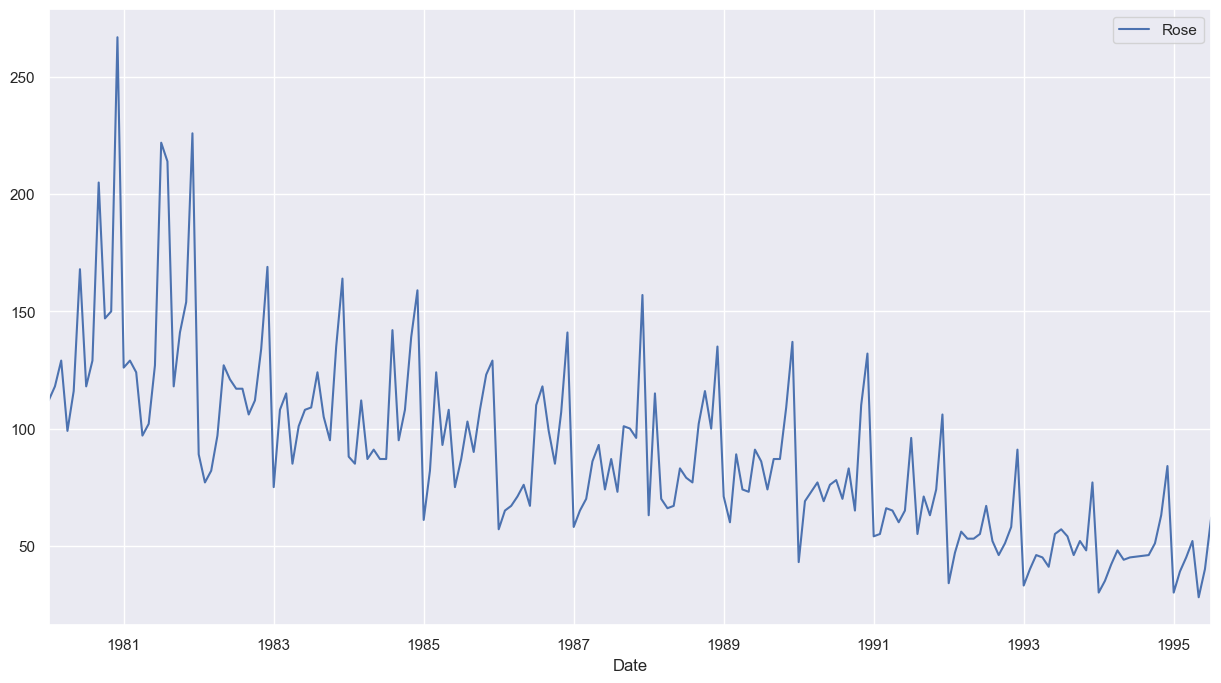

In [168]:
rdf.plot()
plt.show()

# Box plot

## Yearly box plot

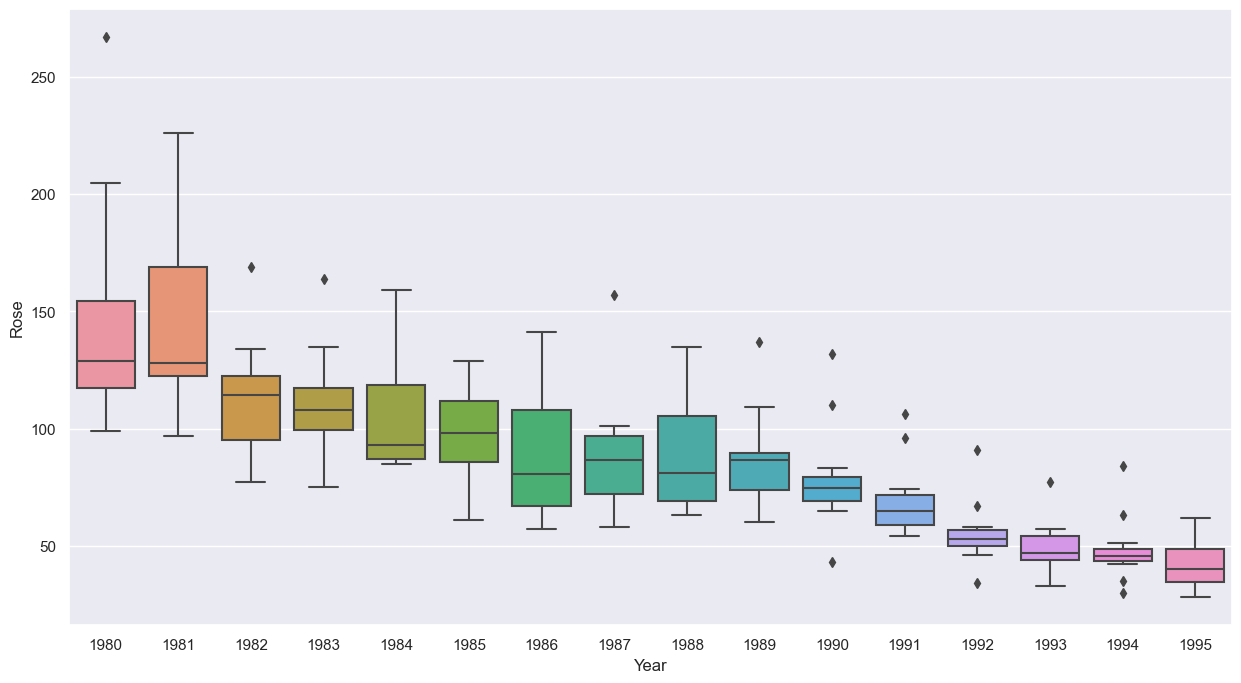

In [169]:
sns.boxplot(x = rdf.index.year, y = rdf["Rose"])
plt.xlabel('Year')
plt.show()

## Monthly box plot

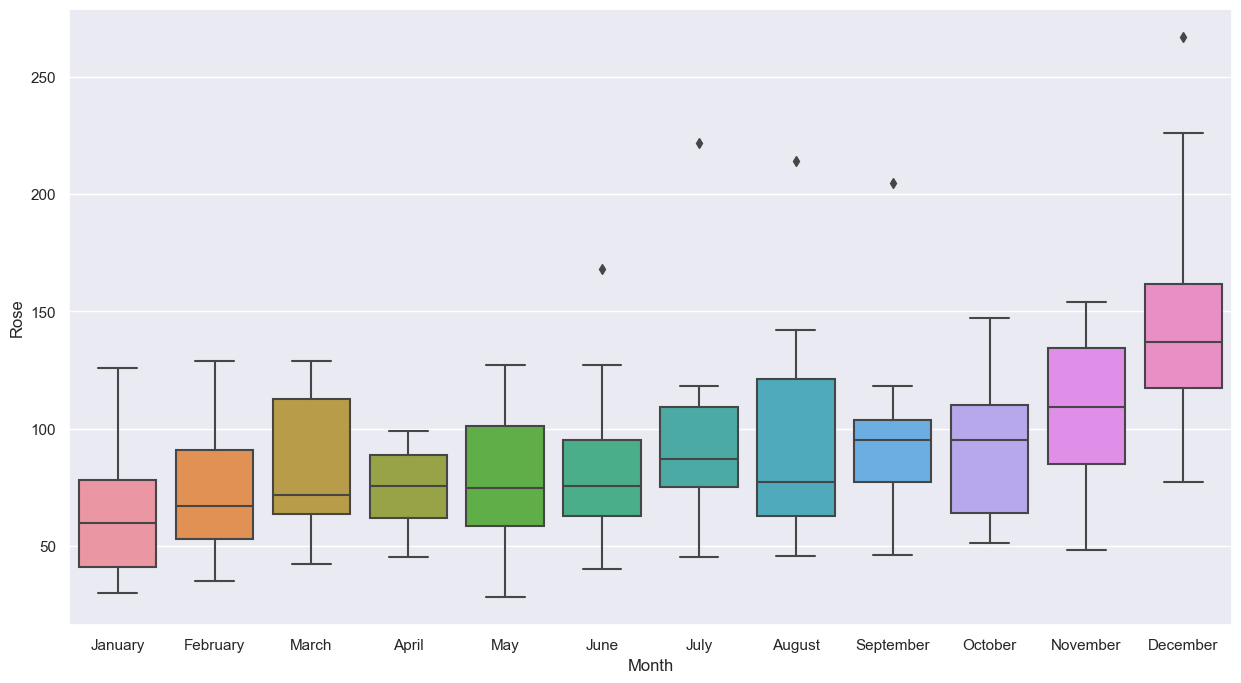

In [170]:
sns.boxplot(x = rdf.index.month_name(), y = rdf["Rose"])
plt.xlabel('Month')
plt.show()

## Monthly sales for Rose Wine across years for each month

In [171]:
from statsmodels.graphics.tsaplots import month_plot

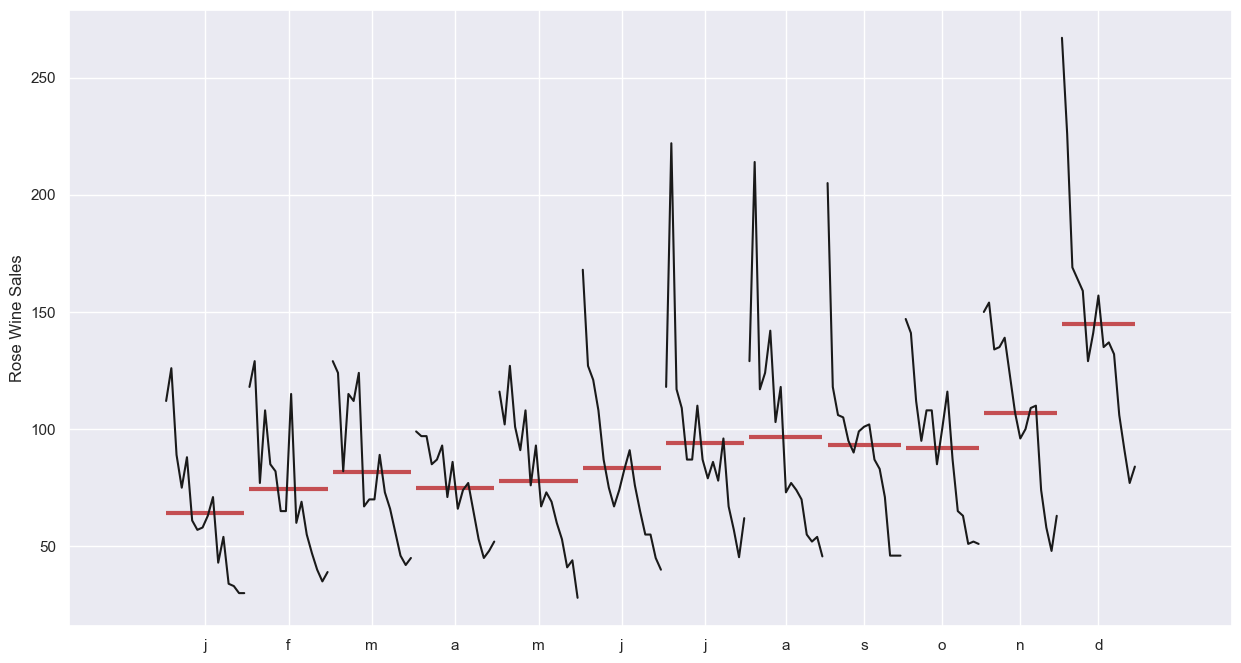

In [172]:
month_plot(rdf, ylabel="Rose Wine Sales")

# Decompose the Time Series

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose

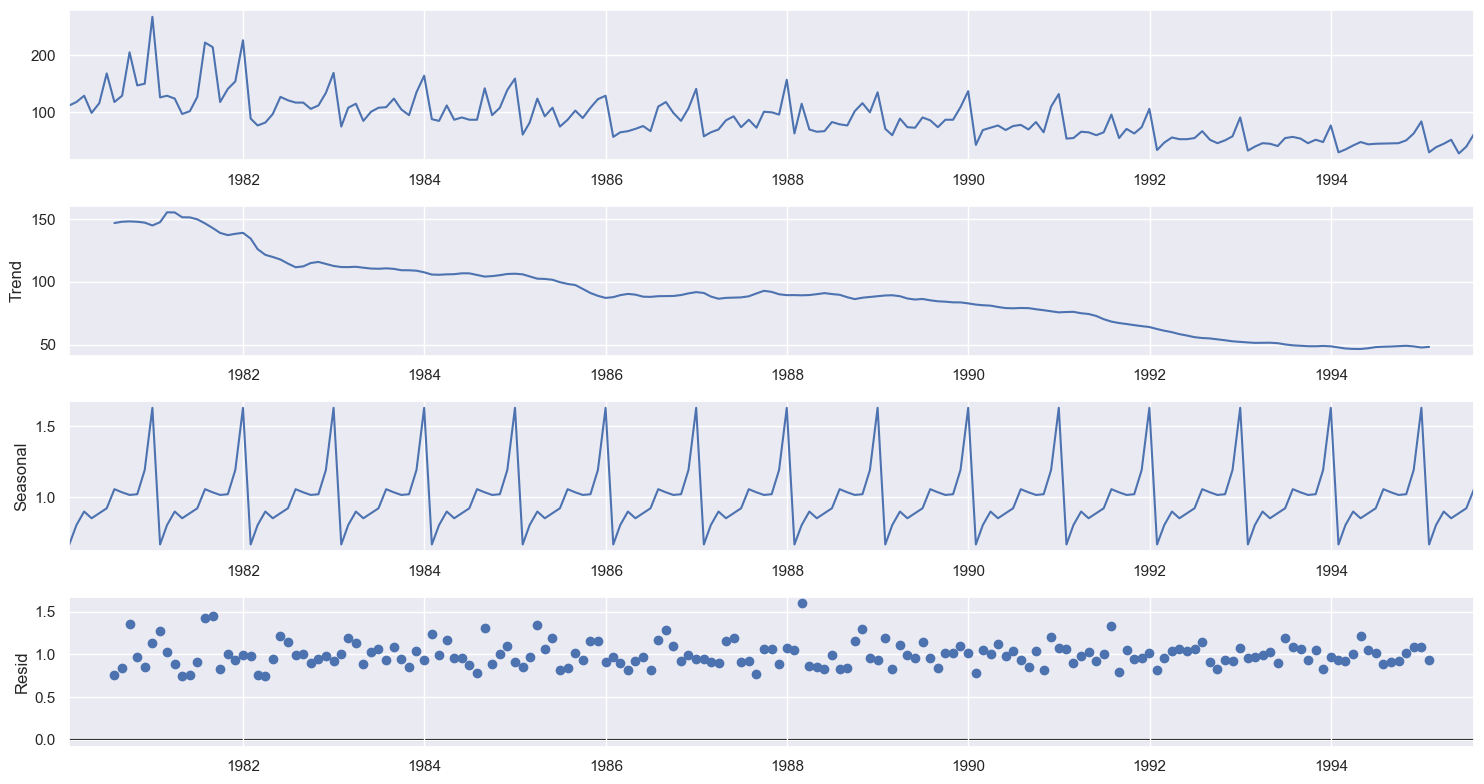

In [174]:
decomposition = seasonal_decompose(rdf, model="multiplicative")
decomposition.plot()

## Trend, Seasonality and Residual

In [175]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print("Trend", "\n", trend.head(12), "\n")
print("Seasonality", "\n", seasonality.head(12), "\n")
print("Residual", "\n", residual.head(12), "\n")

Trend 
 Date
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Freq: M, Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Freq: M, Name: resi

# Train test split & plot

In [176]:
train = rdf[0:int(len(rdf)*0.7)]
test = rdf[int(len(rdf)*0.7):]

In [177]:
train.shape, test.shape

((130, 1), (57, 1))

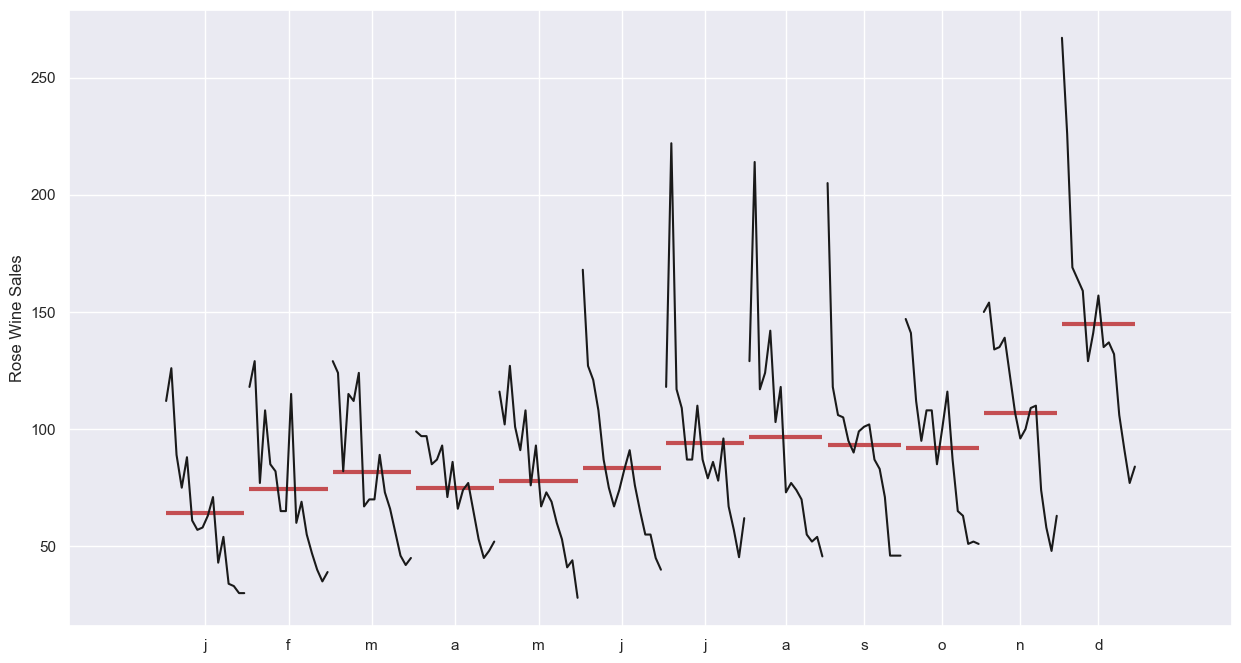

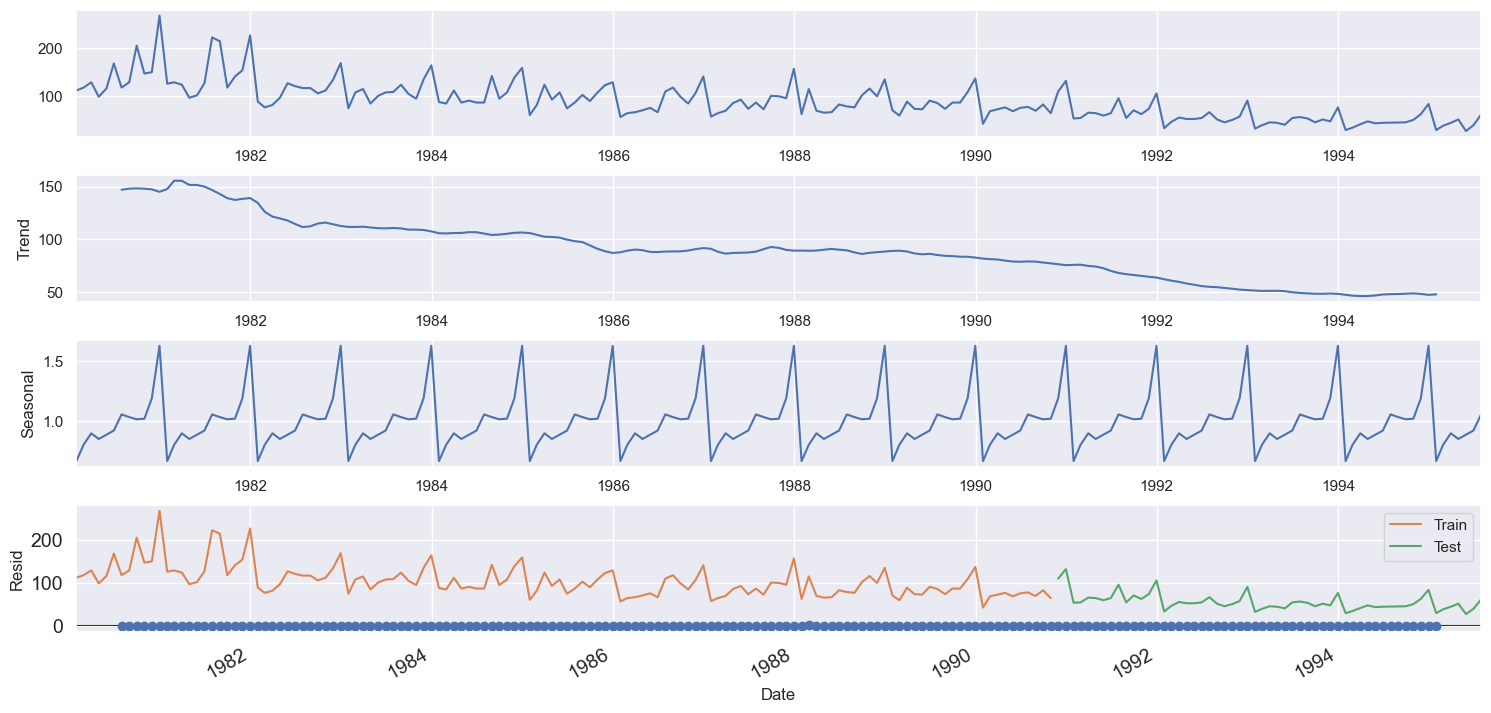

In [178]:
train["Rose"].plot(legend = True, label = "Train", fontsize = 14)
test["Rose"].plot(legend = True, label = "Test", fontsize = 14)
plt.show()

# Linear regression model – RMSE

We are going to regress the "Rose" variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [179]:
train_time  = [i + 1 for i in range(len(train))]
test_time  = [i + 131 for i in range(len(test))]
print("Training time instance", "\n", train_time)
print("Test time instance", "\n", test_time)
print(len(train), len(test))

Training time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test time instance 
 [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
130 57


In [180]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [181]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [182]:
display(LinearRegression_train.head())
display(LinearRegression_train.tail())

Rose  time
Date                   
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5

Rose  time
Date                  
1990-06-30  76.0   126
1990-07-31  78.0   127
1990-08-31  70.0   128
1990-09-30  83.0   129
1990-10-31  65.0   130

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
lr = LinearRegression()

In [185]:
lr.fit(LinearRegression_train[["time"]], LinearRegression_train["Rose"])

LinearRegression()

In [186]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [187]:
LinearRegression_test.head(12)

Rose  time  RegOnTime
Date                              
1990-11-30  110.0   131  70.030411
1990-12-31  132.0   132  69.501222
1991-01-31   54.0   133  68.972033
1991-02-28   55.0   134  68.442844
1991-03-31   66.0   135  67.913654
1991-04-30   65.0   136  67.384465
1991-05-31   60.0   137  66.855276
1991-06-30   65.0   138  66.326087
1991-07-31   96.0   139  65.796897
1991-08-31   55.0   140  65.267708
1991-09-30   71.0   141  64.738519
1991-10-31   63.0   142  64.209330

Plot

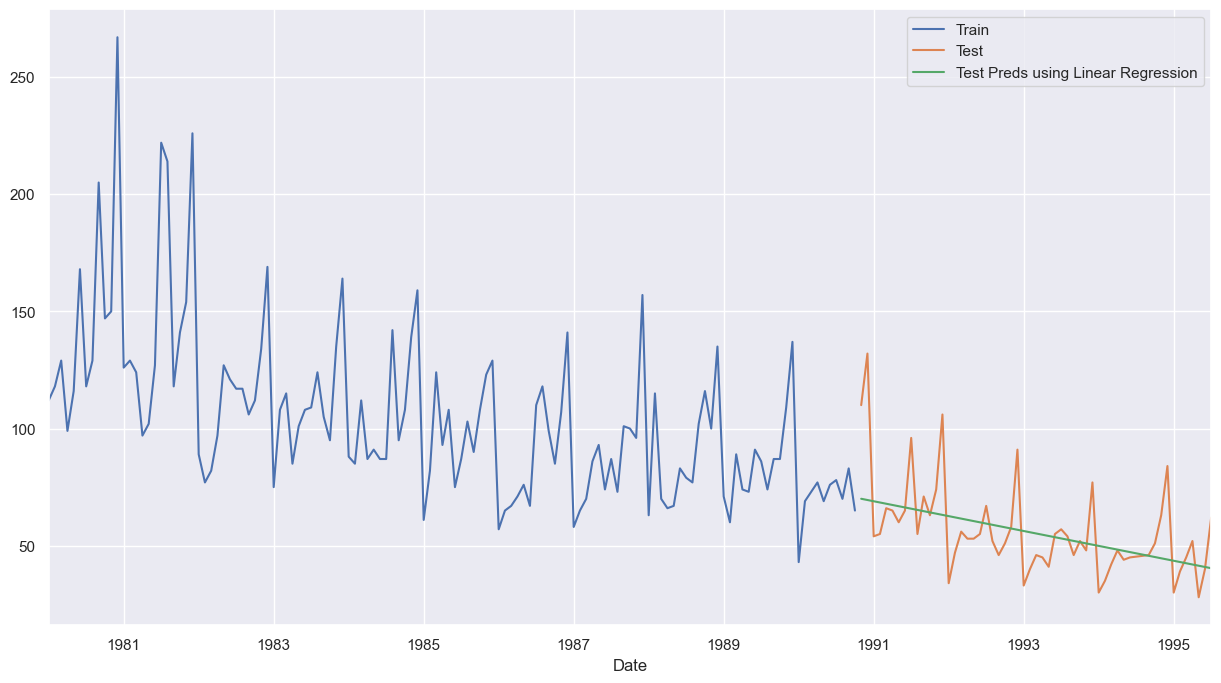

In [188]:
train["Rose"].plot(legend = True, label = 'Train')
test["Rose"].plot(legend = True, label = 'Test')
LinearRegression_test['RegOnTime'].plot(legend = True, label = 'Test Preds using Linear Regression')
plt.show()

Accuracy Metrics

In [189]:
from statsmodels.tools.eval_measures import rmse

Model Evaluation

In [190]:
rmse_model1_test = rmse(test["Rose"], test_predictions_model1)
rmse_model1_test

17.355795984690527

In [191]:
resultsDf = pd.DataFrame({"Test RMSE": [rmse_model1_test]}, index = ["RegressionOnTime"])
resultsDf

Test RMSE
RegressionOnTime  17.355796

# Naïve model – RMSE

In [192]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [193]:
NaiveModel_test["naive"] = train["Rose"][len(train["Rose"])-1]

In [194]:
NaiveModel_test["naive"].head()

Date
1990-11-30    65.0
1990-12-31    65.0
1991-01-31    65.0
1991-02-28    65.0
1991-03-31    65.0
Freq: M, Name: naive, dtype: float64

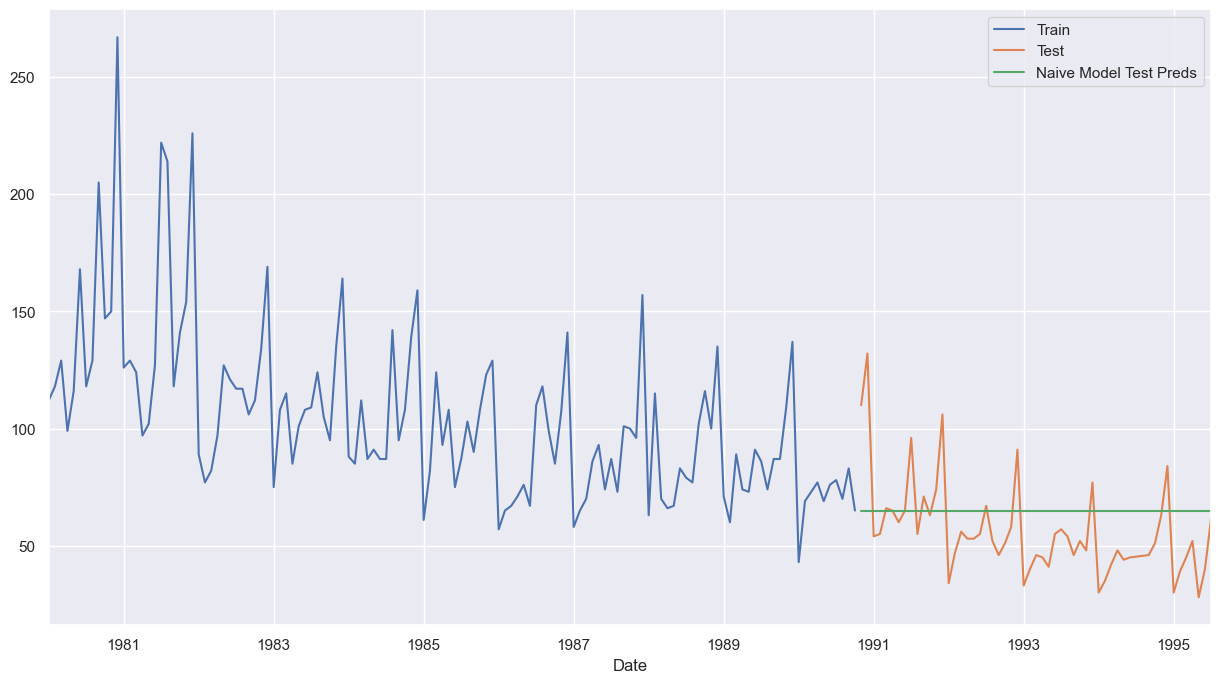

In [195]:
train["Rose"].plot(legend = True, label = "Train")
test["Rose"].plot(legend = True, label = "Test")
NaiveModel_test["naive"].plot(legend = True, label = "Naive Model Test Preds")
plt.show()

Model Evaluation

In [196]:
rmse_model2_test = rmse(test["Rose"], NaiveModel_test["naive"])
print("RMSE for Naive Bayes",rmse_model2_test)


resultsDf_2 = pd.DataFrame({"Test RMSE": [rmse_model2_test]}, index=["NaiveModel"])
resultsDf = pd.concat([resultsDf, resultsDf_2])
display(resultsDf)

RMSE for Naive Bayes 21.7669295095313


Test RMSE
RegressionOnTime  17.355796
NaiveModel        21.766930

# Simple average model – RMSE

In [197]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [198]:
SimpleAverage_test["mean_Rose"] = train["Rose"].mean()
SimpleAverage_test.head()

Rose   mean_Rose
Date                         
1990-11-30  110.0  104.692308
1990-12-31  132.0  104.692308
1991-01-31   54.0  104.692308
1991-02-28   55.0  104.692308
1991-03-31   66.0  104.692308

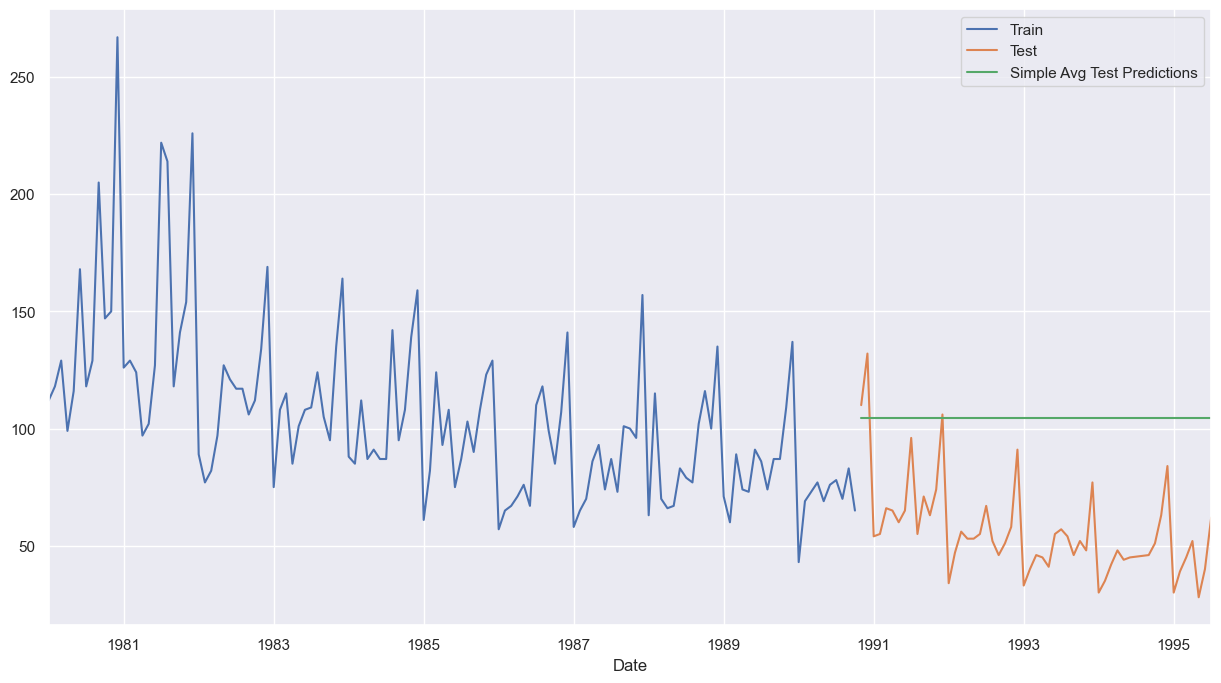

In [199]:
train["Rose"].plot(legend = True, label = "Train")
test["Rose"].plot(legend = True, label = "Test")
SimpleAverage_test["mean_Rose"].plot(legend = True, label = "Simple Avg Test Predictions")
plt.show()

Model Evaluation

In [200]:
rmse_model3_test = rmse(test["Rose"], SimpleAverage_test["mean_Rose"])
print("RMSE for Simple Average Model is", rmse_model3_test)

RMSE for Simple Average Model is 52.4120930517756


In [201]:
reultsDf_3 = pd.DataFrame({"Test RMSE": [rmse_model3_test]}, index = ["SimpleAverageModel"])
resultsDf = pd.concat([resultsDf, reultsDf_3])
resultsDf                     


Test RMSE
RegressionOnTime    17.355796
NaiveModel          21.766930
SimpleAverageModel  52.412093

# Moving average model – RMSE

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [202]:
MovingAverage = rdf.copy()
MovingAverage.head()

Rose
Date             
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Trailing moving averages

In [203]:
MovingAverage["Trailing_2"] = MovingAverage["Rose"].rolling(2).mean()
MovingAverage["Trailing_4"] = MovingAverage["Rose"].rolling(4).mean()
MovingAverage["Trailing_6"] = MovingAverage["Rose"].rolling(6).mean()
MovingAverage["Trailing_9"] = MovingAverage["Rose"].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Date                                                             
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

Plot the data

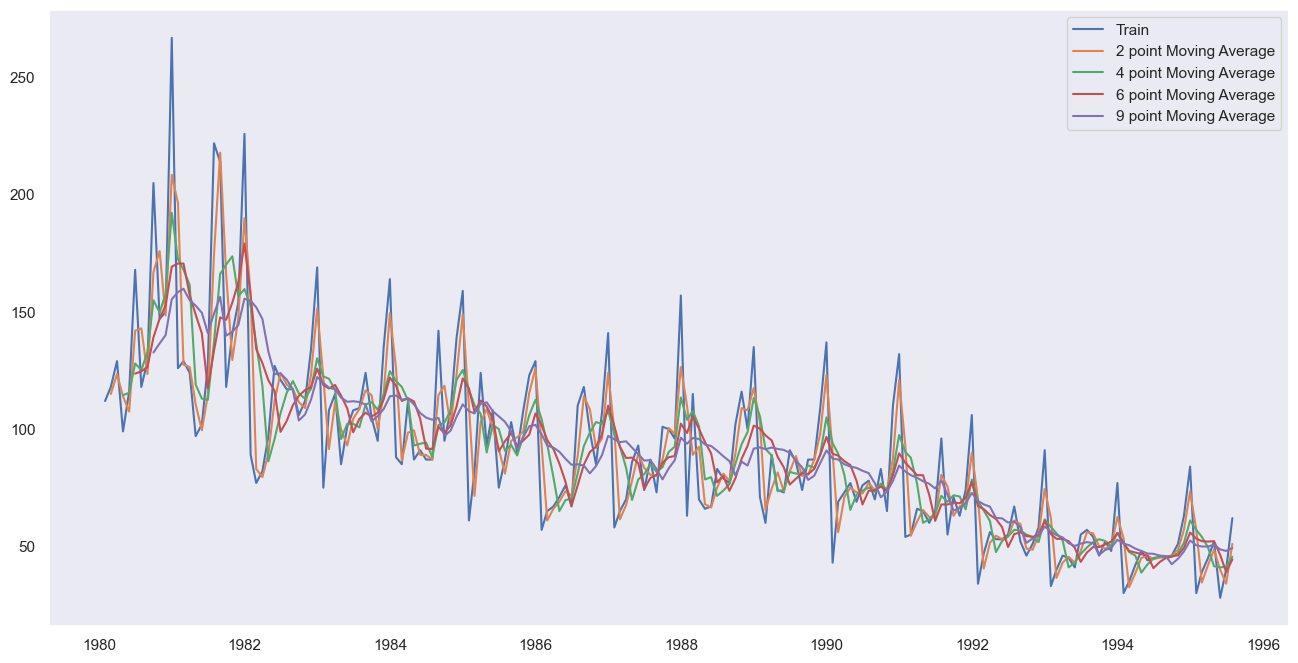

In [204]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage["Rose"], label="Train")
plt.plot(MovingAverage["Trailing_2"], label="2 point Moving Average")
plt.plot(MovingAverage["Trailing_4"], label="4 point Moving Average")
plt.plot(MovingAverage["Trailing_6"], label="6 point Moving Average")
plt.plot(MovingAverage["Trailing_9"], label="9 point Moving Average")

plt.legend(loc="best")
plt.grid()
plt.show()

Split the data into train and test and plot

In [205]:
trailing_MovingAverage_train = MovingAverage[0:int(len(MovingAverage)* 0.7)]
trailing_MovingAverage_test = MovingAverage[int(len(MovingAverage)* 0.7):]

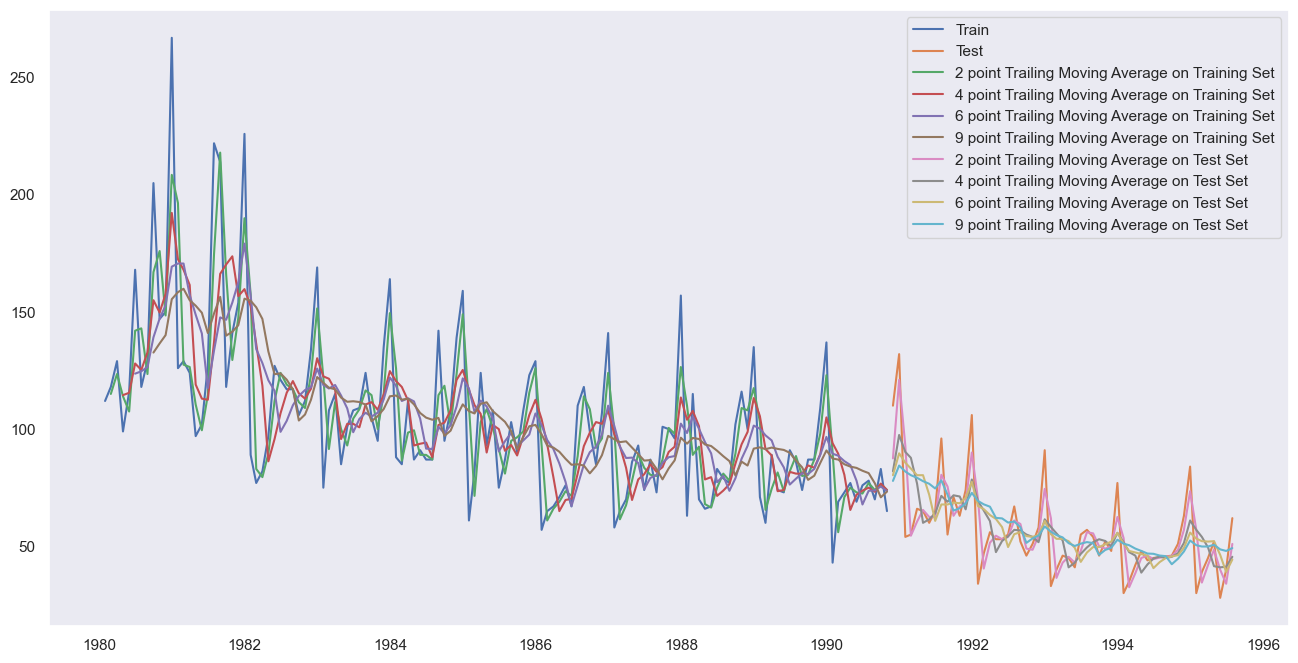

In [206]:
plt.figure(figsize=(16,8))

plt.plot(trailing_MovingAverage_train["Rose"], label="Train")
plt.plot(trailing_MovingAverage_test["Rose"], label="Test")

plt.plot(trailing_MovingAverage_train["Trailing_2"], label="2 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_4"], label="4 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_6"], label="6 point Trailing Moving Average on Training Set")
plt.plot(trailing_MovingAverage_train["Trailing_9"], label="9 point Trailing Moving Average on Training Set")

plt.plot(trailing_MovingAverage_test["Trailing_2"], label="2 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_4"], label="4 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_6"], label="6 point Trailing Moving Average on Test Set")
plt.plot(trailing_MovingAverage_test["Trailing_9"], label="9 point Trailing Moving Average on Test Set")

plt.legend(loc="best")
plt.grid()
plt.show()

Model Evaluation

In [207]:
rmse_model4_test_2 = rmse(test["Rose"], trailing_MovingAverage_test["Trailing_2"])
print("Rmse for trailing_2", rmse_model4_test_2)

rmse_model4_test_4 = rmse(test["Rose"], trailing_MovingAverage_test["Trailing_4"])
print("Rmse for trailing_4", rmse_model4_test_4)

rmse_model4_test_6 = rmse(test["Rose"], trailing_MovingAverage_test["Trailing_6"])
print("Rmse for trailing_6", rmse_model4_test_6)


rmse_model4_test_9 = rmse(test["Rose"], trailing_MovingAverage_test["Trailing_9"])
print("Rmse for trailing_9", rmse_model4_test_9)

resultsDf_4 = pd.DataFrame({"Test RMSE": [rmse_model4_test_2, rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                          index = ["2_point_trailing_Moving_Average", "4_point_trailing_Moving_Average", "6_point_trailing_Moving_Average", "9_point_trailing_Moving_Average"])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Rmse for trailing_2 11.801043169272832
Rmse for trailing_4 15.36721165199188
Rmse for trailing_6 15.862349869522776
Rmse for trailing_9 16.341918830804605


Test RMSE
RegressionOnTime                 17.355796
NaiveModel                       21.766930
SimpleAverageModel               52.412093
2_point_trailing_Moving_Average  11.801043
4_point_trailing_Moving_Average  15.367212
6_point_trailing_Moving_Average  15.862350
9_point_trailing_Moving_Average  16.341919

Plot of all models derived till now

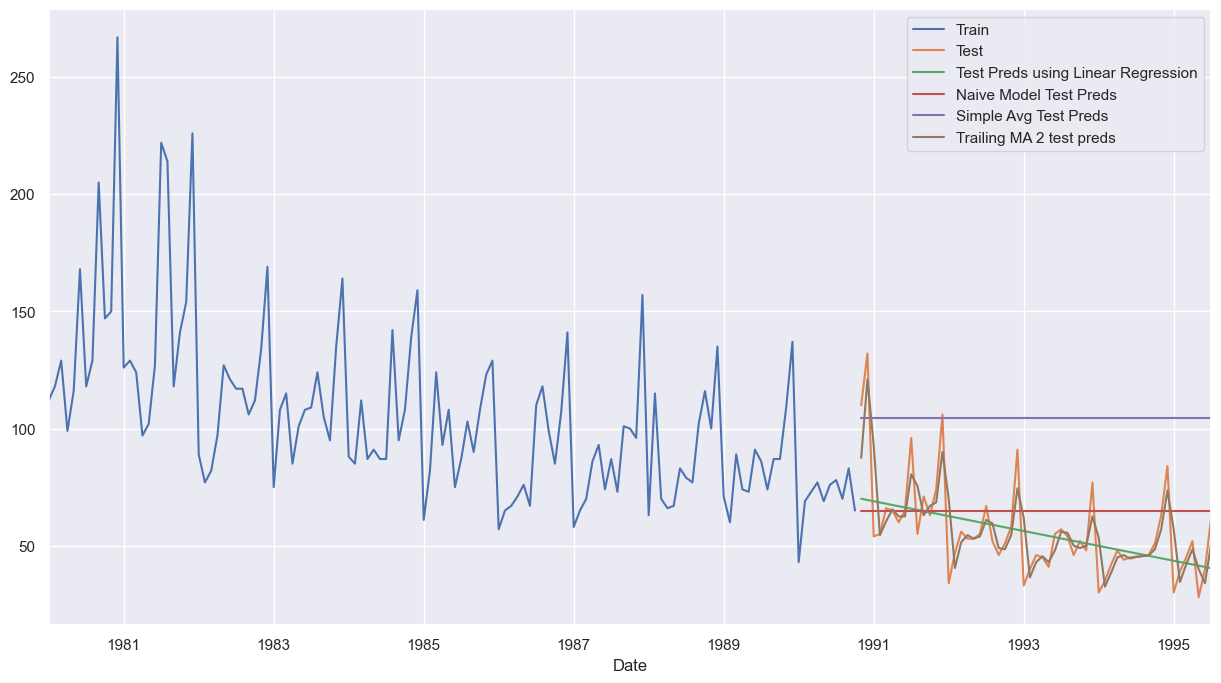

In [208]:
train["Rose"].plot(legend=True, label="Train")
test["Rose"].plot(legend=True, label="Test")

LinearRegression_test["RegOnTime"].plot(legend=True, label="Test Preds using Linear Regression")

NaiveModel_test["naive"].plot(legend=True, label="Naive Model Test Preds")

SimpleAverage_test["mean_Rose"].plot(legend=True, label="Simple Avg Test Preds")

trailing_MovingAverage_test["Trailing_2"].plot(legend=True, label="Trailing MA 2 test preds")

plt.show()

# Simple exponential smoothening – RMSE analysis

In [209]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

'SES Params'

{'smoothing_level': 0.10272110985414433,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.26276638566668,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

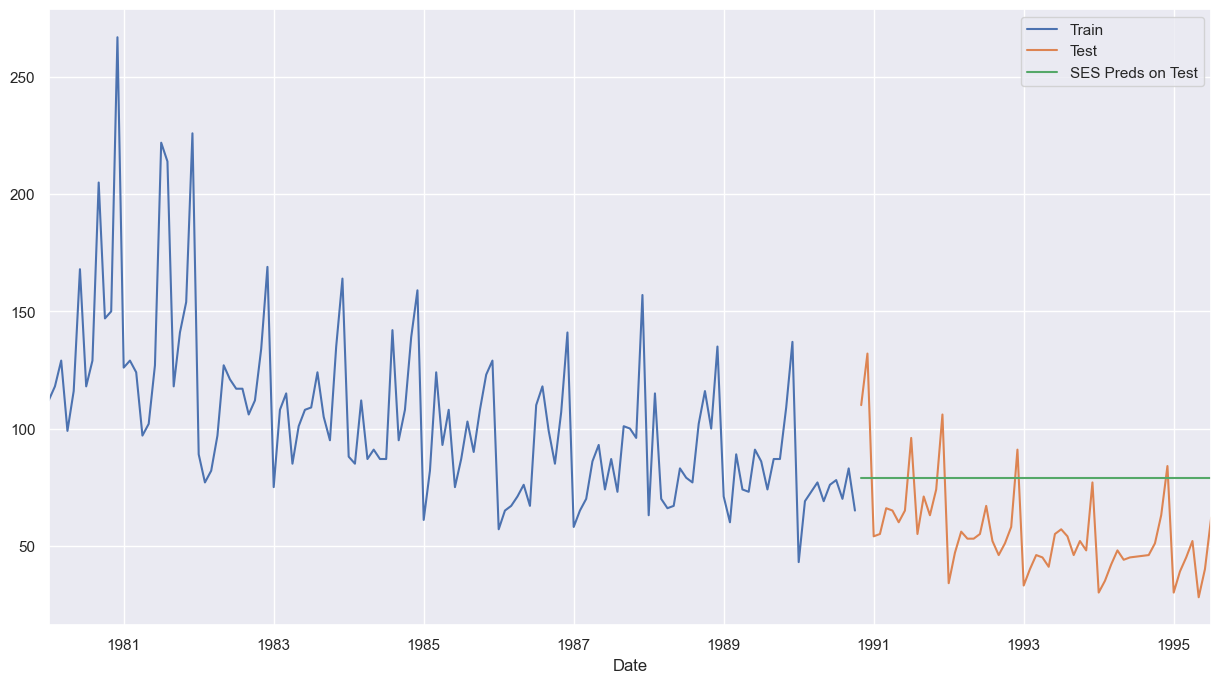

In [210]:
SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train["Rose"]);

model_SES_autofit = model_SES.fit()

display("SES Params", model_SES_autofit.params)

SES_test["predict"] = model_SES_autofit.forecast(steps=len(test))

display(SES_test.head().style)

SES_train["Rose"].plot(legend=True, label="Train")
SES_test["Rose"].plot(legend=True, label="Test")
SES_test["predict"].plot(legend=True, label="SES Preds on Test")
plt.show()


## Model Evaluation

In [211]:
rmse_model5_test_1 = rmse(SES_test["Rose"], SES_test["predict"])
display(rmse_model5_test_1)

resultsDf_5 = pd.DataFrame({"Test RMSE": [rmse_model5_test_1]}, index=["Alpha=0.102,SimpleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_5])
display(resultsDf)


30.188321146697334

Test RMSE
RegressionOnTime                        17.355796
NaiveModel                              21.766930
SimpleAverageModel                      52.412093
2_point_trailing_Moving_Average         11.801043
4_point_trailing_Moving_Average         15.367212
6_point_trailing_Moving_Average         15.862350
9_point_trailing_Moving_Average         16.341919
Alpha=0.102,SimpleExponentialSmoothing  30.188321

## Set different alpha values

In [212]:
resultsDf_6 = pd.DataFrame({"Alpha Values":[], "Train RMSE": [], "Test RMSE": []})


alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i)
    
    SES_train["predict",i] = model_SES_alpha_i.fittedvalues
    SES_test["predict",i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = rmse(SES_train["Rose"],SES_train["predict",i])
        
    rmse_model5_test_i = rmse(SES_test["Rose"],SES_test["predict",i])
    
    resultsDf_6 = resultsDf_6.append({"Alpha Values":i,
                                      "Train RMSE": rmse_model5_train_i,"Test RMSE":rmse_model5_test_i}, 
                                     ignore_index=True)
    
display(SES_test.head().style)

display("Model Evaluation", resultsDf_6.sort_values(by=["Test RMSE"],ascending=True))



'Model Evaluation'

Alpha Values  Train RMSE  Test RMSE
6           0.9   37.507323  22.496819
5           0.8   36.330725  23.212777
4           0.7   35.287880  23.894929
3           0.6   34.371405  24.529811
2           0.5   33.575608  25.109604
1           0.4   32.886154  25.657764
0           0.3   32.270488  26.310348

## Plot

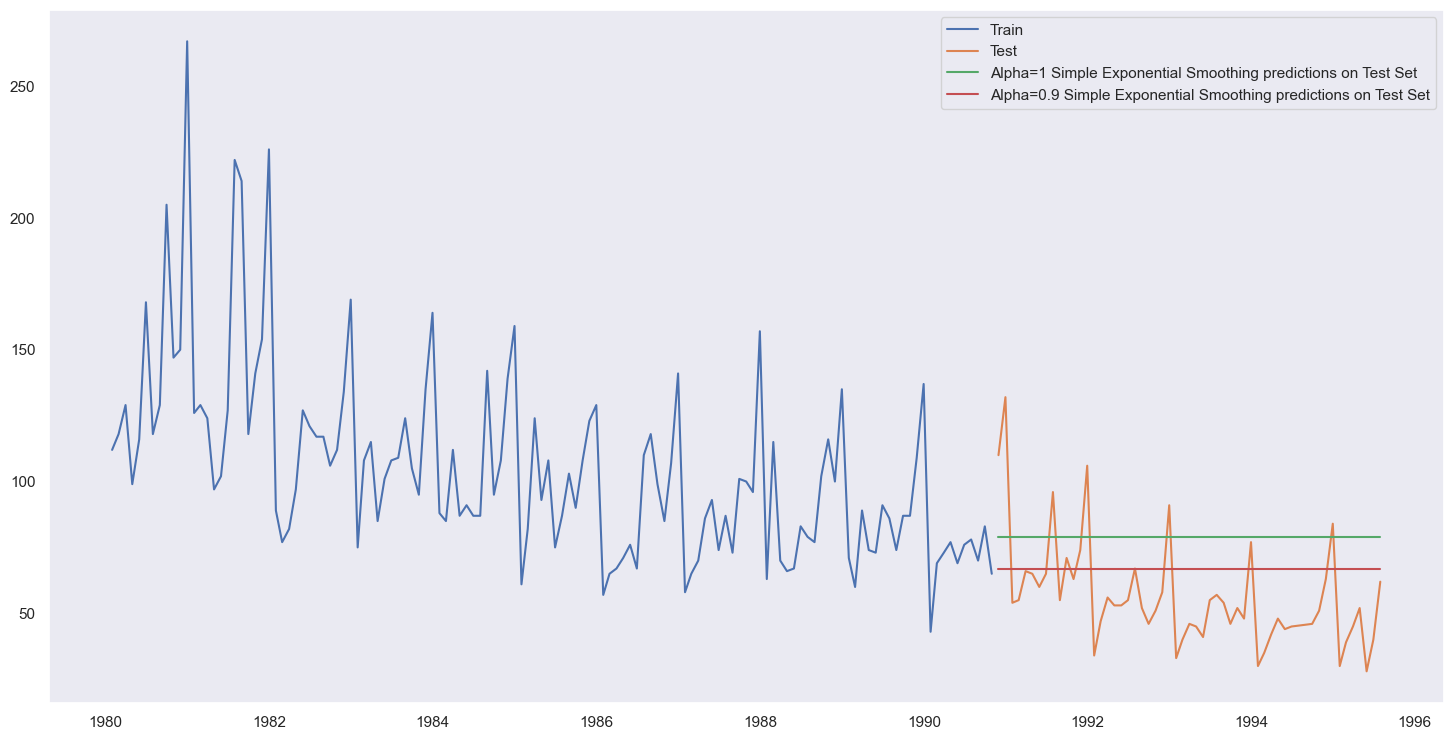

In [213]:
plt.figure(figsize=(18,9))
plt.plot(SES_train["Rose"], label="Train")
plt.plot(SES_test["Rose"], label="Test")
plt.plot(SES_test["predict"], label="Alpha=1 Simple Exponential Smoothing predictions on Test Set")
plt.plot(SES_test["predict", 0.9], label="Alpha=0.9 Simple Exponential Smoothing predictions on Test Set")
plt.legend(loc="best")
plt.grid()
plt.show()

In [214]:
resultsDf_6_1 = pd.DataFrame({"Test RMSE": [resultsDf_6.sort_values(by=["Test RMSE"], ascending=True).values[0][2]]},
                          index = ["Alpha=0.9,SimpleExponentialSmoothing"])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])

display(resultsDf.style)

# Double exponential smoothening (Holt’s method) – RMSE analysis

In [215]:
DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train["Rose"])

resultsDf_7 = pd.DataFrame({"Alpha Values": [], "Beta Values": [], "Train RMSE": [], "Test RMSE": []})

alpha_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
beta_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in alpha_list:
    for j in beta_list:
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j)
        
        DES_train["predict",i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test["predict",i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = rmse(DES_train["Rose"],DES_train["predict",i,j])
        
        rmse_model6_test = rmse(DES_test["Rose"],DES_test["predict",i,j])
        
        resultsDf_7 = resultsDf_7.append({"Alpha Values":i,
                                          "Beta Values":j,
                                          "Train RMSE": rmse_model6_train,
                                          "Test RMSE": rmse_model6_test}, ignore_index=True)
        
display(resultsDf_7.sort_values(by=["Test RMSE"]).head(10))        


Alpha Values  Beta Values  Train RMSE  Test RMSE
1            0.3          0.4   37.249920  18.343250
12           0.4          0.7   40.712820  18.975318
9            0.4          0.4   37.968166  19.133156
17           0.5          0.4   38.587520  19.197151
8            0.4          0.3   36.666779  19.769770
16           0.5          0.3   37.412361  21.812021
18           0.5          0.5   39.623380  23.273511
0            0.3          0.3   35.775030  26.531373
2            0.3          0.5   38.780152  26.672378
10           0.4          0.5   39.107059  30.742510

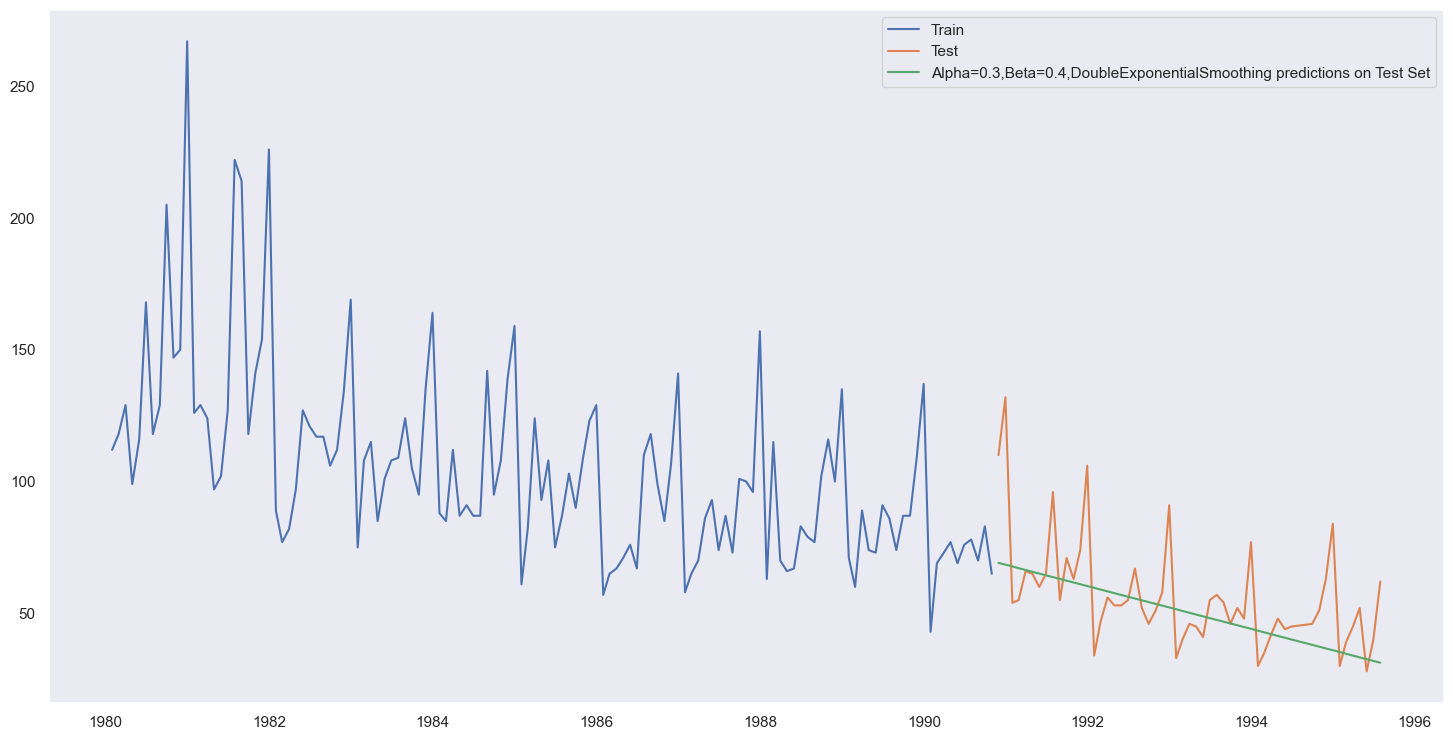

In [216]:
plt.figure(figsize=(18,9))
plt.plot(DES_train["Rose"], label="Train")
plt.plot(DES_test["Rose"], label="Test")

plt.plot(DES_test["predict", 0.3, 0.4],  label="Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set")
plt.legend(loc="best")
plt.grid()
plt.show()

In [217]:
resultsDf_7_1 = pd.DataFrame({"Test RMSE": [resultsDf_7.sort_values(by=["Test RMSE"]).values[0][3]]}, index=["Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
display(resultsDf)

Test RMSE
RegressionOnTime                               17.355796
NaiveModel                                     21.766930
SimpleAverageModel                             52.412093
2_point_trailing_Moving_Average                11.801043
4_point_trailing_Moving_Average                15.367212
6_point_trailing_Moving_Average                15.862350
9_point_trailing_Moving_Average                16.341919
Alpha=0.102,SimpleExponentialSmoothing         30.188321
Alpha=0.9,SimpleExponentialSmoothing           22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing  18.343250

# Triple exponential smoothening (Holt’s winter model) – RMSE analysis

{'smoothing_level': 0.09942398570261507,
 'smoothing_trend': 3.5015167744954147e-06,
 'smoothing_seasonal': 0.0003177759456525393,
 'damping_trend': nan,
 'initial_level': 50.357053101550626,
 'initial_trend': -0.20343379856752272,
 'initial_seasons': array([2.17710238, 2.46036752, 2.6900649 , 2.35930662, 2.64842552,
        2.85295137, 3.14083129, 3.35884852, 3.14457745, 3.09304555,
        3.55647346, 4.90398502]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Rose  auto_predict
Date                           
1990-11-30  110.0          86.0
1990-12-31  132.0         118.0
1991-01-31   54.0          52.0
1991-02-28   55.0          58.0
1991-03-31   66.0          63.0

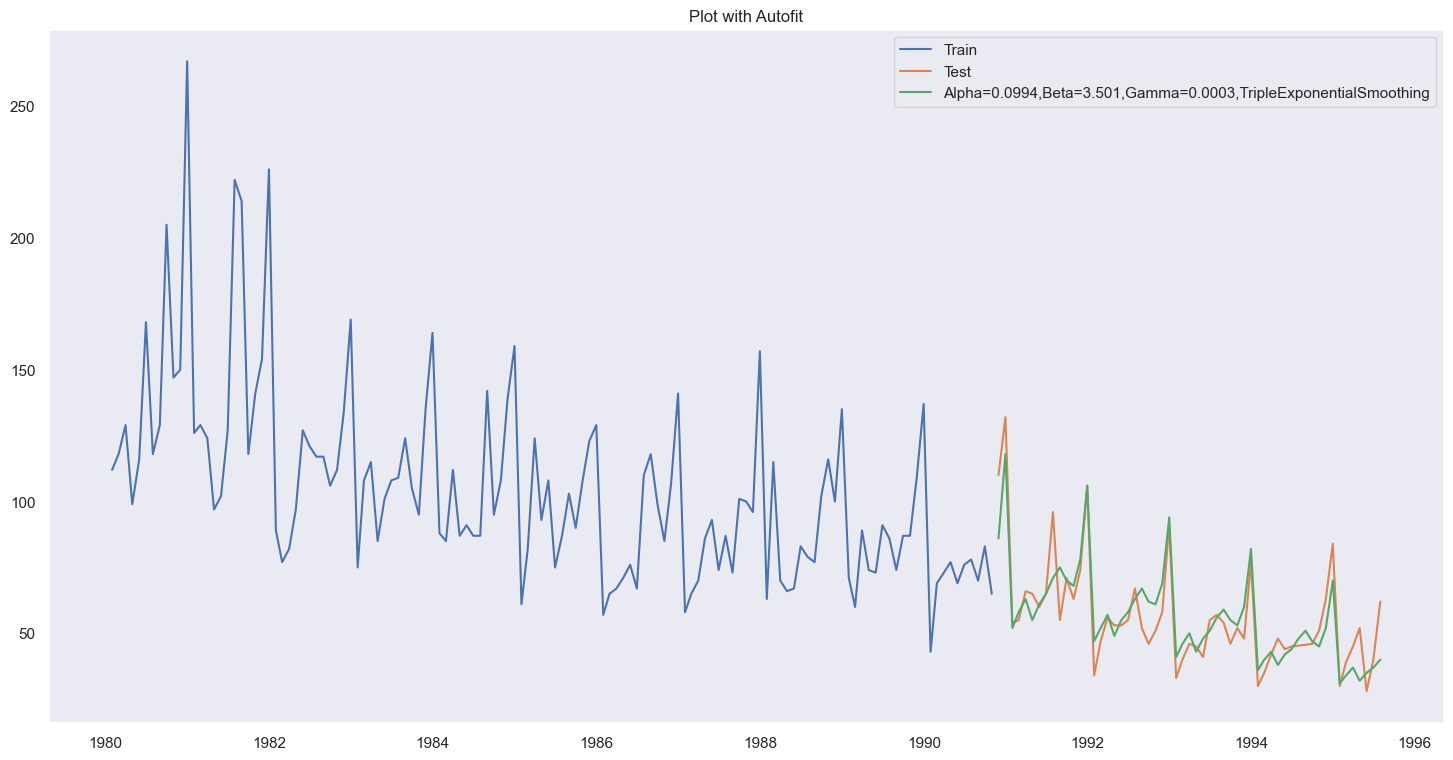

In [218]:
TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(TES_train["Rose"], trend="additive", seasonal="multiplicative", freq="M")

model_TES_autofit = model_TES.fit()

display(model_TES_autofit.params)


TES_test["auto_predict"] = model_TES_autofit.forecast(steps=len(test)).round(0)
display(TES_test.head())

plt.figure(figsize=(18,9))
plt.plot(TES_train["Rose"], label="Train")
plt.plot(TES_test["Rose"], label="Test")
plt.plot(TES_test["auto_predict"], label="Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExponentialSmoothing")
plt.legend(loc="best")
plt.title("Plot with Autofit")
plt.grid()

plt.show()



## RMSE

In [219]:
rmse_model6_test_1 = rmse(TES_test["Rose"], TES_test["auto_predict"])
display(rmse_model6_test_1)

resultsDf_8_1 = pd.DataFrame({"Test RMSE": [rmse_model6_test_1]}, index=["Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExponentialSmoothing"])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
display(resultsDf)

9.331662339974077

Test RMSE
RegressionOnTime                                    17.355796
NaiveModel                                          21.766930
SimpleAverageModel                                  52.412093
2_point_trailing_Moving_Average                     11.801043
4_point_trailing_Moving_Average                     15.367212
6_point_trailing_Moving_Average                     15.862350
9_point_trailing_Moving_Average                     16.341919
Alpha=0.102,SimpleExponentialSmoothing              30.188321
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExpo...   9.331662

## Identify best alpha, beta and gamma

In [220]:
resultsDf_8_2 = pd.DataFrame({"Alpha Values":[],"Beta Values":[],"Gamma Values":[],"Train RMSE":[],"Test RMSE": []})


gamma_list = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


for i in alpha_list:
    for j in beta_list:
        for k in gamma_list:
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k)
            
            TES_train["predict",i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            
            TES_test["predict",i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = rmse(TES_train["Rose"],
                                     TES_train["predict",i,j,k])
            
            rmse_model8_test = rmse(TES_test["Rose"],
                                    TES_test["predict",i,j,k])
            
            resultsDf_8_2 = resultsDf_8_2.append({"Alpha Values":i,
                                                  "Beta Values":j,
                                                  "Gamma Values":k,
                                                  "Train RMSE":rmse_model8_train,
                                                  "Test RMSE":rmse_model8_test},ignore_index=True)
            
display(TES_test.head().style)
display(resultsDf_8_2.sort_values(by=["Test RMSE"]).head())


resultsDf_8_3 = pd.DataFrame({"Test RMSE": [resultsDf_8_2.sort_values(by=["Test RMSE"]).values[0][4]]}
                           ,index=["Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialSmoothing"])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
display(resultsDf.sort_values(by=["Test RMSE"]))



Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE
5             0.3          0.3           0.8   29.465008  23.805020
14            0.3          0.4           0.9   30.868522  34.413326
6             0.3          0.3           0.9   29.968807  42.723357
7             0.3          0.3           1.0   30.803480  73.649293
220           0.6          0.6           0.7  279.867788  74.466416

Test RMSE
Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExpo...   9.331662
2_point_trailing_Moving_Average                     11.801043
4_point_trailing_Moving_Average                     15.367212
6_point_trailing_Moving_Average                     15.862350
9_point_trailing_Moving_Average                     16.341919
RegressionOnTime                                    17.355796
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
NaiveModel                                          21.766930
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialS...  23.805020
Alpha=0.102,SimpleExponentialSmoothing              30.188321
SimpleAverageModel                                  52.412093

## Plot SES, DES and TES

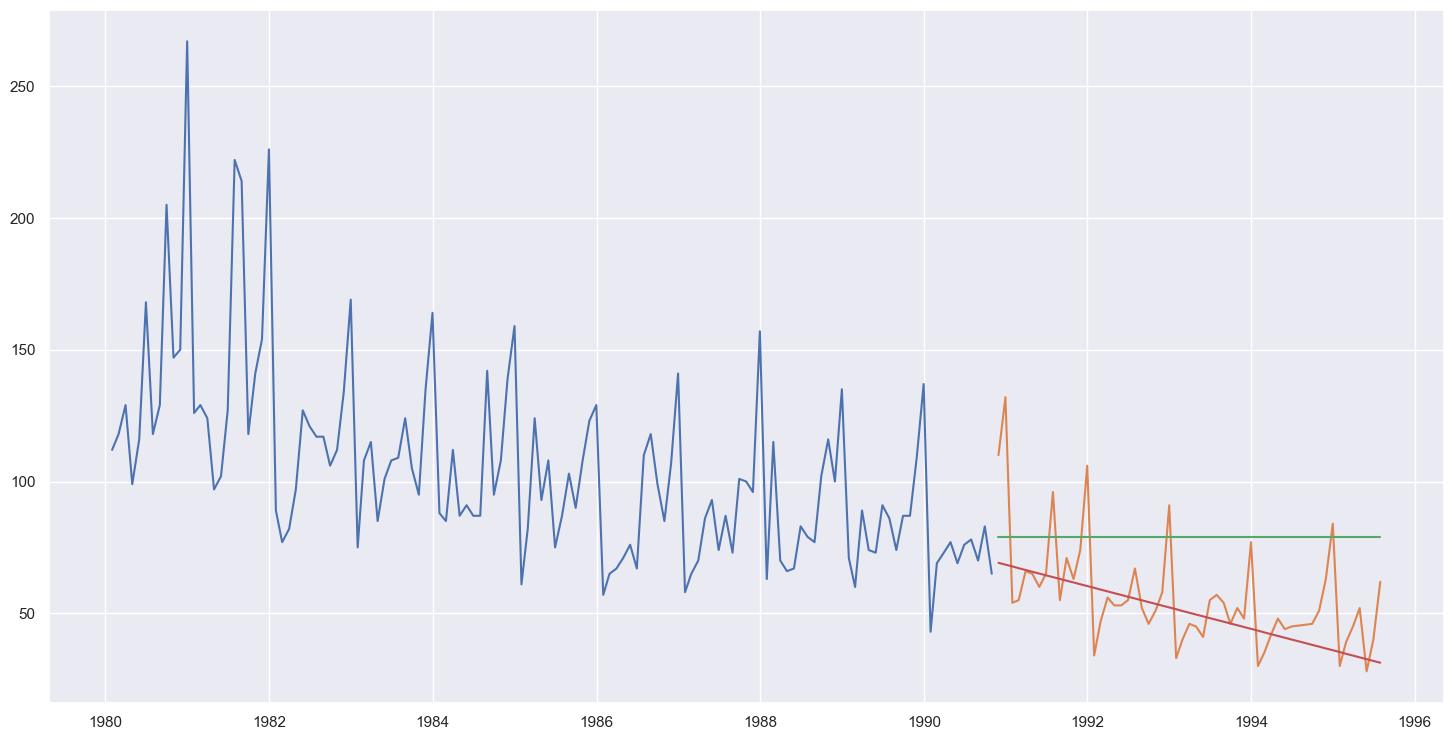

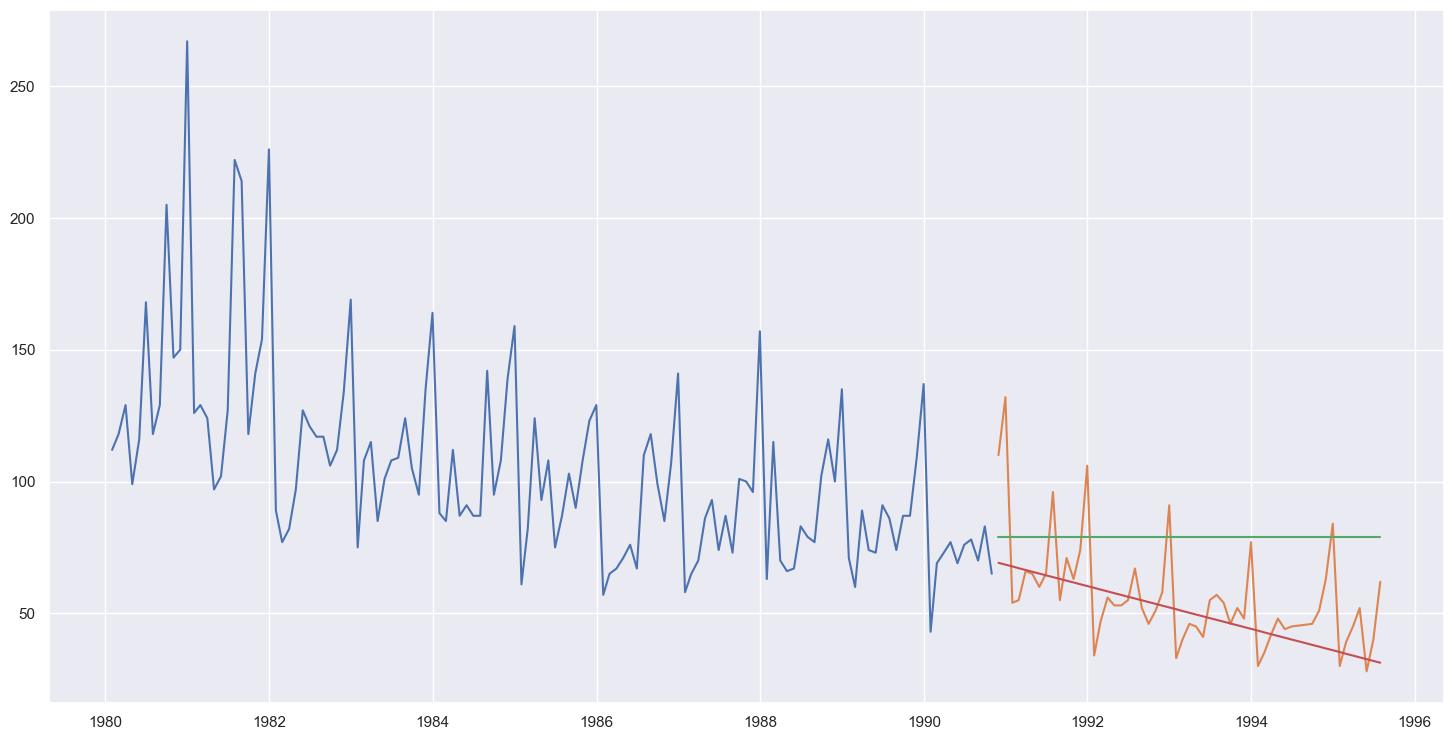

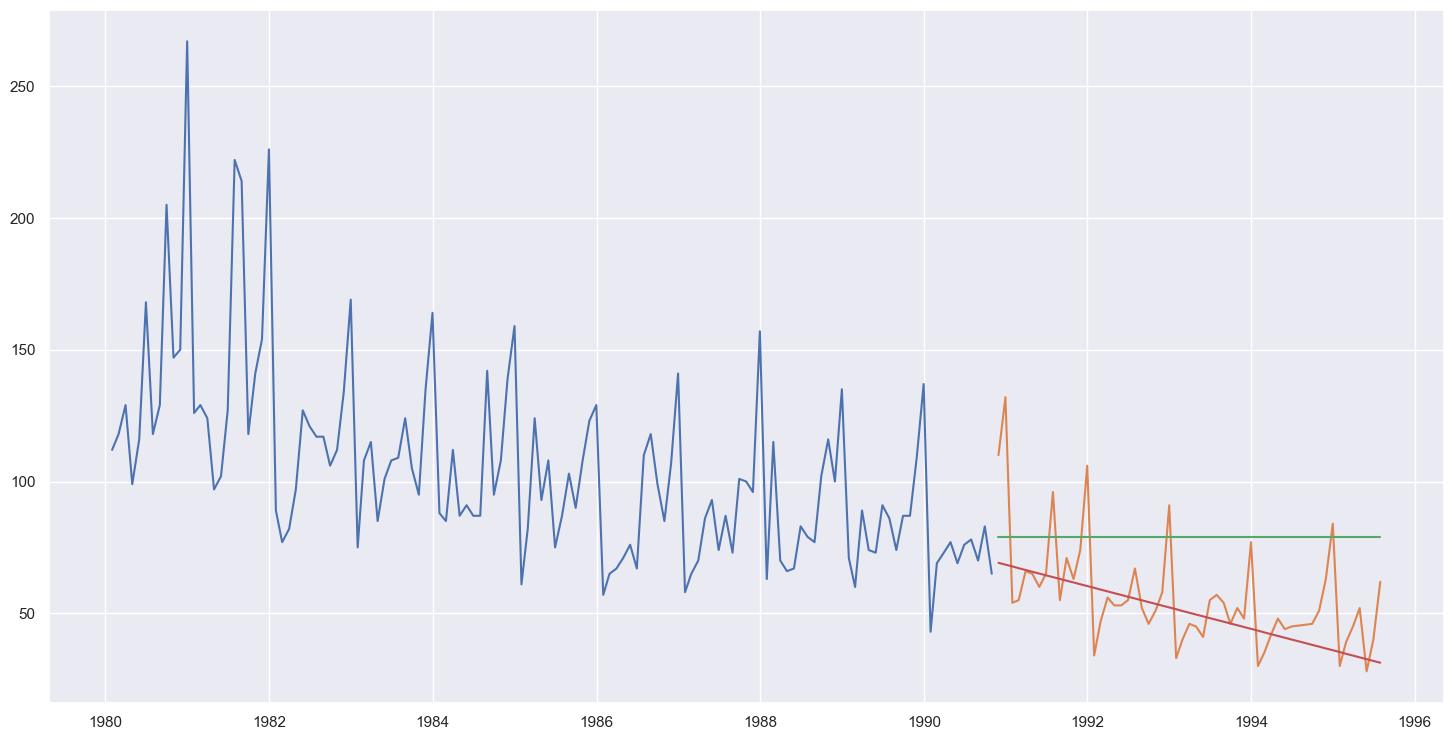

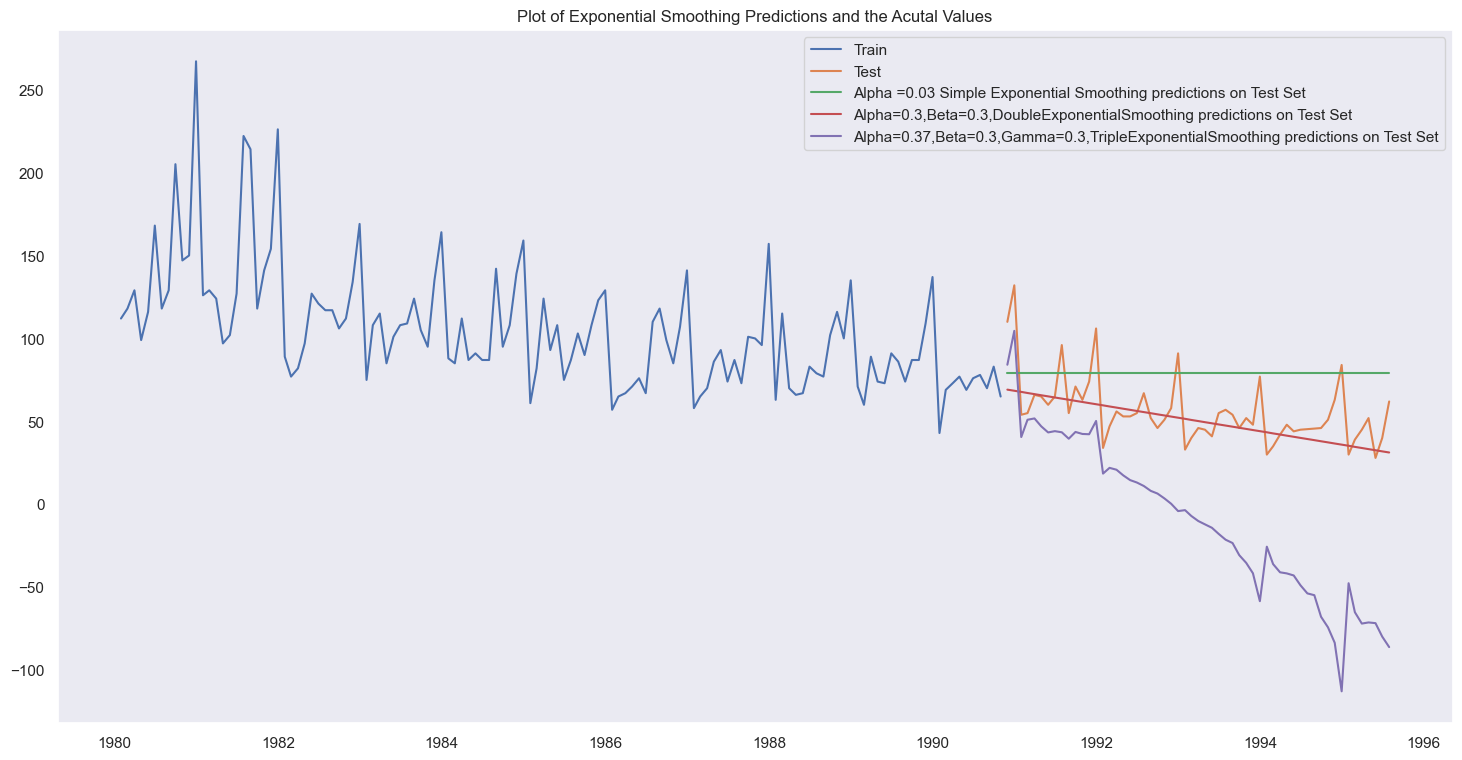

In [240]:
# 'smoothing_level': 0.09942398570261507,
#  'smoothing_trend': 3.5015167744954147e-06,
#  'smoothing_seasonal': 0.0003177759456525393,

plt.figure(figsize=(18,9))
plt.plot(train["Rose"], label="Train")
plt.plot(test["Rose"], label="Test")

plt.plot(SES_test["predict"], label="Alpha =0.03 Simple Exponential Smoothing predictions on Test Set")

plt.plot(DES_test["predict", 0.3, 0.4], label="Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set")

plt.plot(TES_test["predict", 0.3, 0.3, 0.3], label="Alpha=0.37,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set")

plt.legend(loc="best")
plt.grid();
plt.title("Plot of Exponential Smoothing Predictions and the Acutal Values");
plt.show()

## Training TES model with full data

'RMSE'

16.098963863336504

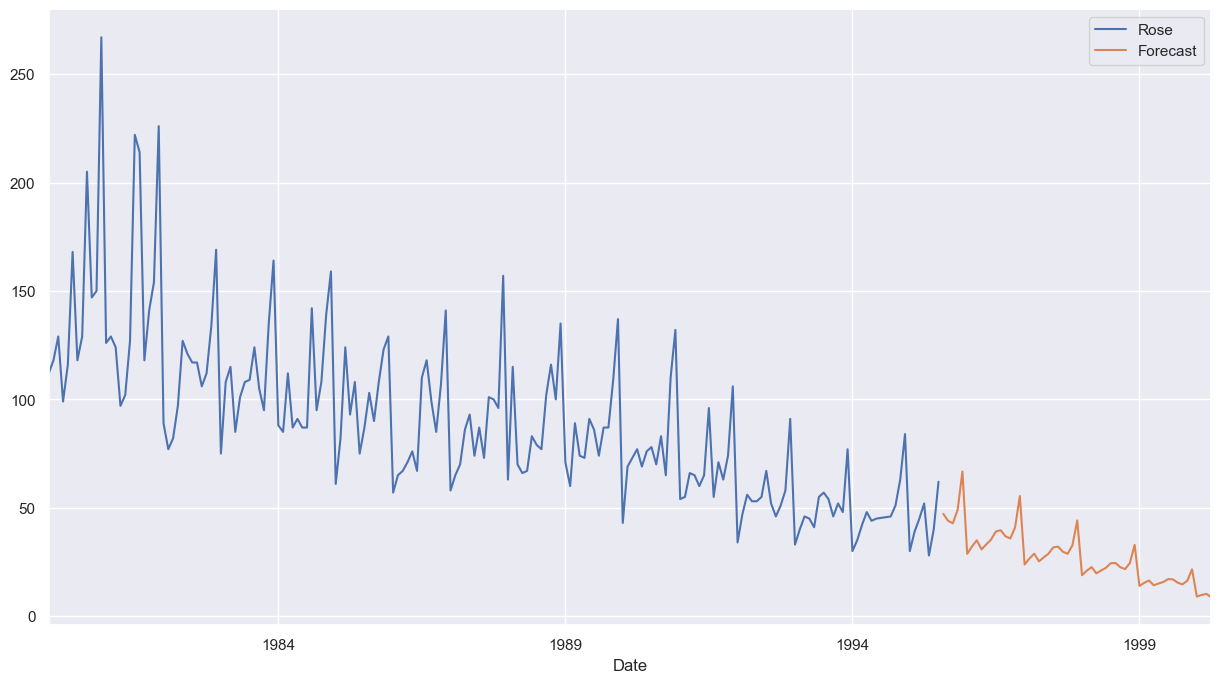

In [242]:
# 'smoothing_level': 0.09942398570261507,
#  'smoothing_trend': 3.5015167744954147e-06,
#  'smoothing_seasonal': 0.0003177759456525393,

fullmodel1 = ExponentialSmoothing(rdf,trend="additive",seasonal="multiplicative")
fullmodel1= fullmodel1.fit(smoothing_level=0.09942398570261507, smoothing_trend=3.5015167744954147e-06, smoothing_seasonal=0.0003177759456525393)

RMSE_fullmodel1 = rmse(rdf["Rose"], fullmodel1.fittedvalues)
display("RMSE", RMSE_fullmodel1)

prediction_1 = fullmodel1.forecast(steps=len(test))

rdf.plot(legend=True, label="Actual")
prediction_1.plot(legend=True, label="Forecast")

plt.show()


## Margin of Error

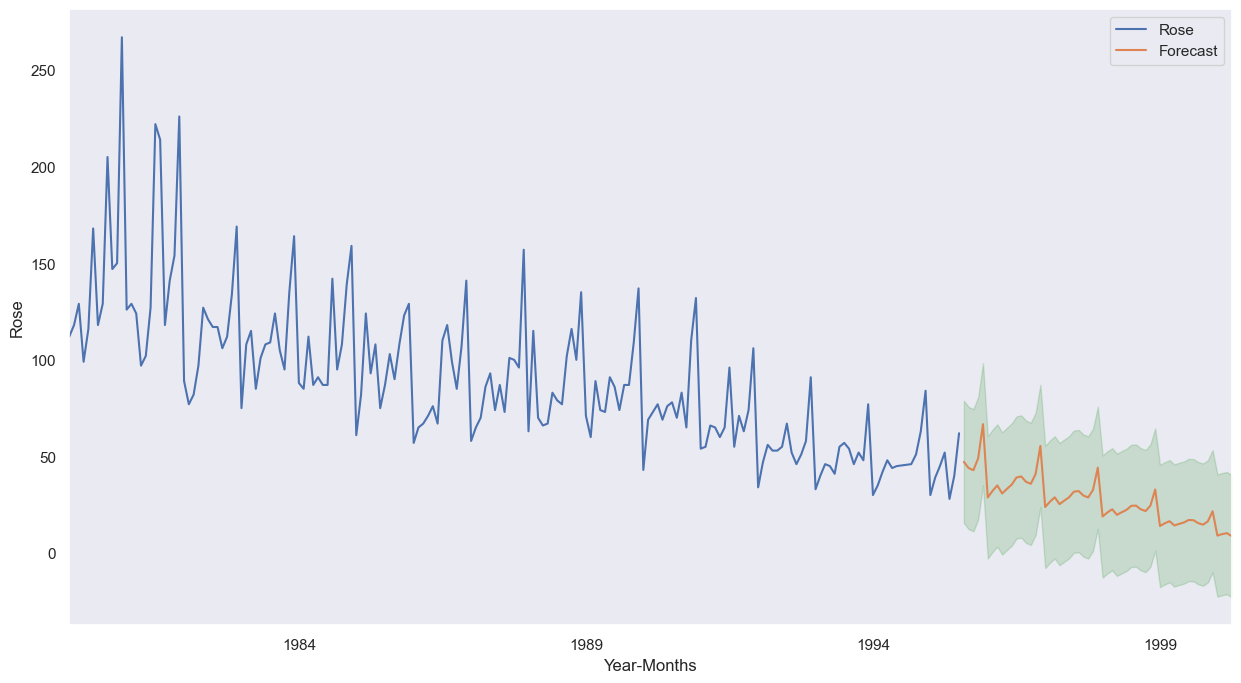

In [243]:
pred_1_df = pd.DataFrame({"lower_CI":prediction_1 - 1.96*fullmodel1.resid.std(),
                          "prediction":prediction_1,
                          "upper_ci": prediction_1 + 1.96*fullmodel1.resid.std()})
display(pred_1_df.head().style)


axis = rdf.plot(label="Actual", figsize=(15,8))
pred_1_df["prediction"].plot(ax=axis, label="Forecast", alpha=1) # alpha here is for transparency of the prediction line

axis.fill_between(pred_1_df.index, pred_1_df["lower_CI"], pred_1_df["upper_ci"], color="green", alpha=.15) # alpha here denotes the transparency of the shaded region

axis.set_xlabel("Year-Months")
axis.set_ylabel("Rose")
plt.legend(loc="best")
plt.grid()
plt.show();

# Stationarity check with AdFuller

In [245]:
from statsmodels.tsa.stattools import adfuller

display("Results of Dickey-Fuller Test:")
dftest = adfuller(rdf["Rose"])

dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])

for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value

display(dfoutput)
display("P Value: ", dftest[1], "H0 rejected and the time series is stationary")

'Results of Dickey-Fuller Test:'

Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64

'P Value: '

0.34310071428337663

'H0 rejected and the time series is stationary'

# Build ARIMA model with lowest AIC score – test this model on test data using RMSE

In [246]:
import itertools # library for generating all possible combinations of given number sets
from statsmodels.tsa.arima_model import ARIMA

p = q = range(0, 4)
d= range(1,2) # required as itertools product function expects the parameters as range objects, even if it is only value

pdq = list(itertools.product(p, d, q))
 
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=["Param", "AIC"])
ARIMA_AIC

for param in pdq:
    ARIMA_model = ARIMA(train["Rose"], order=param).fit()
    
    display(f"ARIMA{param} - AIC:{ARIMA_model.aic}")
    
    ARIMA_AIC=ARIMA_AIC.append({"Param":param, "AIC": ARIMA_model.aic}, ignore_index=True)
    
display(ARIMA_AIC.sort_values(by=["AIC"],ascending=True))    

'ARIMA(0, 1, 0) - AIC:1315.1645929217334'

'ARIMA(0, 1, 1) - AIC:1258.0390481752695'

'ARIMA(0, 1, 2) - AIC:1254.7866839310911'

'ARIMA(0, 1, 3) - AIC:1255.9820212050467'

'ARIMA(1, 1, 0) - AIC:1299.0560243200787'

'ARIMA(1, 1, 1) - AIC:1255.6046180090214'

'ARIMA(1, 1, 2) - AIC:1255.2709089113102'

'ARIMA(1, 1, 3) - AIC:1257.246553982989'

'ARIMA(2, 1, 0) - AIC:1280.0806971753088'

'ARIMA(2, 1, 1) - AIC:1256.8625945468596'

'ARIMA(2, 1, 2) - AIC:1257.240182633537'

'ARIMA(2, 1, 3) - AIC:1259.172540549623'

'ARIMA(3, 1, 0) - AIC:1278.7737919287586'

'ARIMA(3, 1, 1) - AIC:1257.566696596936'

'ARIMA(3, 1, 2) - AIC:1258.9627288567867'

'ARIMA(3, 1, 3) - AIC:1252.2974714055429'

Param          AIC
15  (3, 1, 3)  1252.297471
2   (0, 1, 2)  1254.786684
6   (1, 1, 2)  1255.270909
5   (1, 1, 1)  1255.604618
3   (0, 1, 3)  1255.982021
9   (2, 1, 1)  1256.862595
10  (2, 1, 2)  1257.240183
7   (1, 1, 3)  1257.246554
13  (3, 1, 1)  1257.566697
1   (0, 1, 1)  1258.039048
14  (3, 1, 2)  1258.962729
11  (2, 1, 3)  1259.172541
12  (3, 1, 0)  1278.773792
8   (2, 1, 0)  1280.080697
4   (1, 1, 0)  1299.056024
0   (0, 1, 0)  1315.164593

In [247]:
auto_ARIMA = ARIMA(train["Rose"], order=(3,1,3),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

display(results_auto_ARIMA.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rose   No. Observations:                  129
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -618.149
Method:                       css-mle   S.D. of innovations             28.174
Date:                Fri, 13 Aug 2021   AIC                           1252.297
Time:                        05:05:18   BIC                           1275.176
Sample:                    02-29-1980   HQIC                          1261.593
                         - 10-31-1990                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5281      0.088     -6.019      0.000      -0.700      -0.356
ar.L1.D.Rose    -0.7400      0.087     -8.549      0.000      -0.910      -0.570
ar.L2.D.Rose    -0.7400      0.087     -8.530      0.000      -0.910      -0.570
ar.L3.D.Rose     0.2585      0.086      3.012      0.003       0.090       0.427
ma.L1.D.Rose    -0.0172      0.042     -0.410      0.682      -0.100       0.065
ma.L2.D.Rose     0.0172      0.042      0.411      0.681      -0.065       0.100
ma.L3.D.Rose    -1.0000      0.045    -22.166      0.000      -1.088      -0.912
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5002           -0.8667j            1.0007           -0.3333
AR.2           -0.5002           +0.8667j            1.0007            0.3333
AR.3            3.8625           -0.0000j            3.8625           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.4914           -0.8709j            1.0000           -0.3318
MA.3           -0.4914           +0.8709j            1.0000            0.3318
-----------------------------------------------------------------------------
"""

## Prediction

In [248]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

RMSE_autoarima = rmse(test["Rose"],predicted_auto_ARIMA[0])
display(RMSE_autoarima)

resultsDf_arima = pd.DataFrame({'Test RMSE': [RMSE_autoarima]}
                           ,index=['ARIMA(3,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_arima])

display(resultsDf)

16.932227077140286

Test RMSE
RegressionOnTime                                    17.355796
NaiveModel                                          21.766930
SimpleAverageModel                                  52.412093
2_point_trailing_Moving_Average                     11.801043
4_point_trailing_Moving_Average                     15.367212
6_point_trailing_Moving_Average                     15.862350
9_point_trailing_Moving_Average                     16.341919
Alpha=0.102,SimpleExponentialSmoothing              30.188321
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExpo...   9.331662
Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialS...  23.805020
ARIMA(3,1,3)                                        16.932227

## Manual Arima using ACF and PACF plots

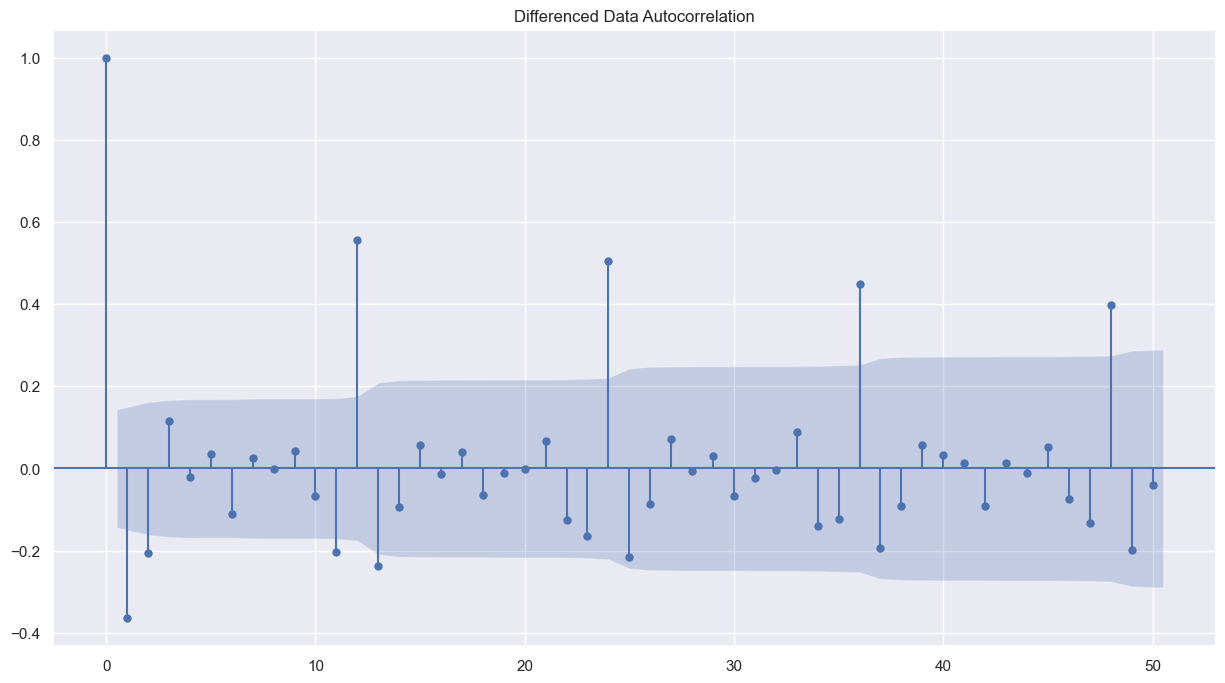

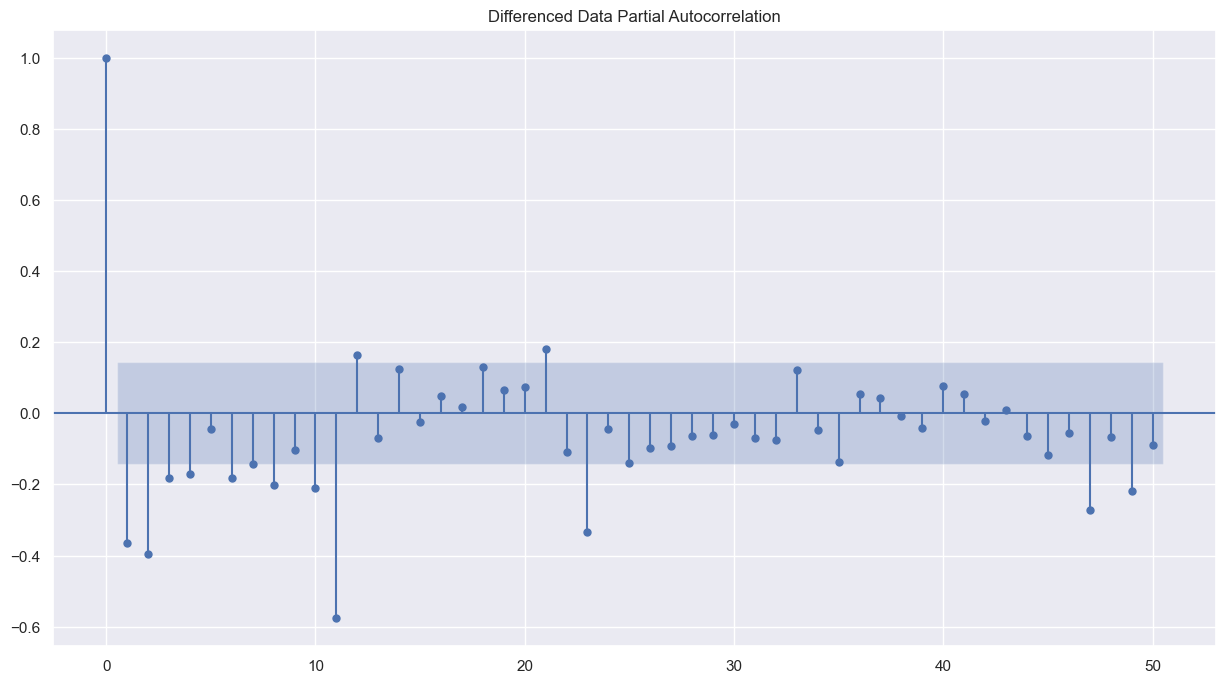

'p value from PACF: 4 & q value from ACF: 2'

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rose   No. Observations:                  129
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -623.557
Method:                       css-mle   S.D. of innovations             29.645
Date:                Fri, 13 Aug 2021   AIC                           1263.114
Time:                        05:06:30   BIC                           1285.992
Sample:                    02-29-1980   HQIC                          1272.410
                         - 10-31-1990                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3255      0.579     -0.562      0.574      -1.460       0.809
ar.L1.D.Rose     1.1628      0.087     13.292      0.000       0.991       1.334
ar.L2.D.Rose    -0.3422      0.133     -2.581      0.010      -0.602      -0.082
ar.L3.D.Rose     0.1805      0.132      1.366      0.172      -0.078       0.439
ar.L4.D.Rose    -0.2167      0.091     -2.386      0.017      -0.395      -0.039
ma.L1.D.Rose    -1.9521        nan        nan        nan         nan         nan
ma.L2.D.Rose     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1144           -0.4025j            1.1849           -0.0552
AR.2            1.1144           +0.4025j            1.1849            0.0552
AR.3           -0.6980           -1.6731j            1.8129           -0.3129
AR.4           -0.6980           +1.6731j            1.8129            0.3129
MA.1            0.9761           -0.2174j            1.0000           -0.0349
MA.2            0.9761           +0.2174j            1.0000            0.0349
-----------------------------------------------------------------------------
"""

Test RMSE
RegressionOnTime                                    17.355796
NaiveModel                                          21.766930
SimpleAverageModel                                  52.412093
2_point_trailing_Moving_Average                     11.801043
4_point_trailing_Moving_Average                     15.367212
6_point_trailing_Moving_Average                     15.862350
9_point_trailing_Moving_Average                     16.341919
Alpha=0.102,SimpleExponentialSmoothing              30.188321
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExpo...   9.331662
Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialS...  23.805020
ARIMA(3,1,3)                                        16.932227
Manual ARIMA(3,1,2)                                 17.357524
Manual ARIMA(4,1,2)                                 18.482592

In [250]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(rdf["Rose"].diff().dropna(),lags=50,title='Differenced Data Autocorrelation');
plot_pacf(rdf["Rose"].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation');
plt.show()

display("p value from PACF: 4 & q value from ACF: 2")

manual_ARIMA = ARIMA(train["Rose"].astype("float64"), order=(4,1,2),freq="M")
results_manual_ARIMA = manual_ARIMA.fit()
display(results_manual_ARIMA.summary())

predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

RMSE_manualarima = rmse(test["Rose"],
                        predicted_manual_ARIMA[0])

resultsDf_manual_arima = pd.DataFrame({'Test RMSE': [RMSE_manualarima]}
                           ,index=['Manual ARIMA(4,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_manual_arima])

display(resultsDf)

# Build SARIMA model with lowest AIC score – test this model on test data using RMSE

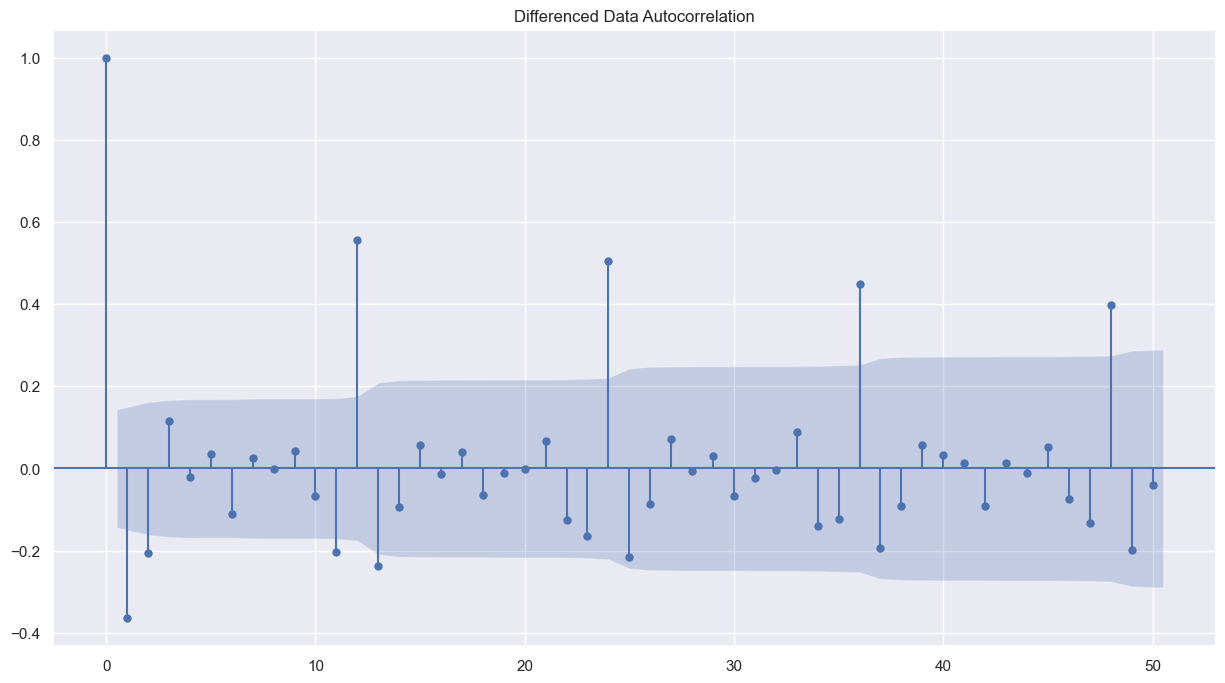

'Seasonality is observed for 6 and 12'

In [251]:
plot_acf(rdf["Rose"].diff().dropna(),lags=50,title="Differenced Data Autocorrelation");
plt.show()

display("Seasonality is observed for 6 and 12")

In [252]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX

p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))] # seasonal PDQ


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])




In [253]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = SARIMAX(train["Rose"],order=param, 
                               seasonal_order = param_seasonal,enforce_stationarity=False,
                               enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({"param":param,
                                        "seasonal":param_seasonal, 
                                        "AIC": results_SARIMA.aic},
                                       ignore_index=True)


In [254]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 6)  1025.823325
80  (2, 1, 2)  (2, 0, 2, 6)  1029.198815
53  (1, 1, 2)  (2, 0, 2, 6)  1031.313979
71  (2, 1, 1)  (2, 0, 2, 6)  1034.131058
44  (1, 1, 1)  (2, 0, 2, 6)  1034.920837

In [256]:
auto_SARIMA_6 = SARIMAX(train["Rose"].values,
                       order=(0,1,2),
                       seasonal_order=(2,0,2,6),
                       enforce_stationarity=False,
                       enforce_ivertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
display(results_auto_SARIMA_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  130
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -505.916
Date:                           Fri, 13 Aug 2021   AIC                           1025.832
Time:                                   05:10:29   BIC                           1044.985
Sample:                                        0   HQIC                          1033.605
                                           - 130                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7857      0.993     -0.791      0.429      -2.732       1.160
ma.L2         -0.2108      0.256     -0.823      0.411      -0.713       0.292
ar.S.L6       -0.0636      0.038     -1.686      0.092      -0.138       0.010
ar.S.L12       0.8374      0.042     19.798      0.000       0.754       0.920
ma.S.L6        0.2028     20.876      0.010      0.992     -40.713      41.118
ma.S.L12      -0.7963     16.666     -0.048      0.962     -33.461      31.868
sigma2       346.2802   7186.775      0.048      0.962   -1.37e+04    1.44e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                94.13
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.42
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction on the Test Set and Evaluation

In [257]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

display(predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head())

rmse_autosarima6 = rmse(test["Rose"], predicted_auto_SARIMA_6.predicted_mean)
display(rmse_autosarima6)

temp_resultsDf = pd.DataFrame({"Test RMSE" : [rmse_autosarima6]}, index = ["SARIMA(0,1,2)(2,0,2,6)"])
resultsDf = pd.concat([resultsDf, temp_resultsDf])

display(resultsDf)


y        mean    mean_se  mean_ci_lower  mean_ci_upper
0   85.165651  19.135968      47.659842     122.671459
1  109.392962  19.607644      70.962687     147.823237
2   66.205382  19.607756      27.774885     104.635878
3   67.799742  19.609683      29.365470     106.234014
4   75.474093  19.601375      37.056104     113.892082

25.75779637324097

Test RMSE
RegressionOnTime                                    17.355796
NaiveModel                                          21.766930
SimpleAverageModel                                  52.412093
2_point_trailing_Moving_Average                     11.801043
4_point_trailing_Moving_Average                     15.367212
6_point_trailing_Moving_Average                     15.862350
9_point_trailing_Moving_Average                     16.341919
Alpha=0.102,SimpleExponentialSmoothing              30.188321
Alpha=0.9,SimpleExponentialSmoothing                22.496819
Alpha=0.3,Beta=0.4,DoubleExponentialSmoothing       18.343250
Alpha=0.0994,Beta=3.501,Gamma=0.0003,TripleExpo...   9.331662
Alpha=0.3,Beta=0.3,Gamma=0.8,TripleExponentialS...  23.805020
ARIMA(3,1,3)                                        16.932227
Manual ARIMA(3,1,2)                                 17.357524
Manual ARIMA(4,1,2)                                 18.482592
SARIMA(0,1,2)(2,0,2,6)                              25.757796

## SARIMA for 12 Seasonality

In [293]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]


SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])


In [294]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model =SARIMAX(train["Rose"],
                                            order=param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        
        SARIMA_AIC = SARIMA_AIC.append({"param":param,
                                        "seasonal":param_seasonal, 
                                        "AIC": results_SARIMA.aic},
                                       ignore_index=True)

In [295]:
SARIMA_AIC.sort_values(by=["AIC"]).head()

param       seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 12)  1521.737955
50  (1, 1, 2)  (1, 0, 2, 12)  1521.949494
80  (2, 1, 2)  (2, 0, 2, 12)  1523.223053
77  (2, 1, 2)  (1, 0, 2, 12)  1523.524946
26  (0, 1, 2)  (2, 0, 2, 12)  1523.707297

In [296]:
auto_SARIMA_12 =SARIMAX(train["Rose"],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)

display(results_auto_SARIMA_12.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -752.869
Date:                            Fri, 13 Aug 2021   AIC                           1521.738
Time:                                    03:59:19   BIC                           1542.738
Sample:                                01-31-1980   HQIC                          1530.241
                                     - 10-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6466      0.268     -2.415      0.016      -1.171      -0.122
ma.L1          0.2835      0.300      0.944      0.345      -0.305       0.872
ma.L2         -1.1683      0.331     -3.529      0.000      -1.817      -0.519
ar.S.L12       0.7532      0.508      1.482      0.138      -0.243       1.749
ar.S.L24       0.3250      0.541      0.601      0.548      -0.735       1.385
ma.S.L12      -0.9794      0.491     -1.997      0.046      -1.941      -0.018
ma.S.L24      -0.5626      0.670     -0.840      0.401      -1.875       0.750
sigma2      4.952e+04   2.51e+04      1.975      0.048     382.828    9.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 8.05
Prob(Q):                              0.69   Prob(JB):                         0.02
Heteroskedasticity (H):               1.46   Skew:                             0.21
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict on the Test Set and Evaluation

In [297]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

display(predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head())

rmse_autosarima12 = rmse(test["Rose"], predicted_auto_SARIMA_12.predicted_mean)

display("RMSE", rmse_autosarima12)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_autosarima12]}, index=['SARIMA(1,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

display(resultsDf)


Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1990-11-30  4695.891736  380.030457    3951.045727    5440.737746
1990-12-31  7226.446359  388.883360    6464.248979    7988.643738
1991-01-31  1584.495202  389.273717     821.532736    2347.457668
1991-02-28  1417.430509  392.114399     648.900408    2185.960609
1991-03-31  1828.791153  392.150554    1060.190191    2597.392114

'RMSE'

712.7484012954795

Test RMSE
RegressionOnTime                                    1392.438305
NaiveModel                                          1496.444629
SimpleAverageModel                                  1368.746717
2_point_trailing_Moving_Average                      811.178937
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
9_point_trailing_Moving_Average                     1422.653281
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...   410.692577
ARIMA(2,1,2)                                        1364.201025
Manual ARIMA(3,1,2)                                 1363.340999
SARIMA(1,1,2)(2,0,2,6)                               871.032024
SARIMA(1,1,2)(2,0,2,12)                              712.748401

## Manual SARIMA model - Best Params seleced from ACF and PACF plots - Seasonality 6

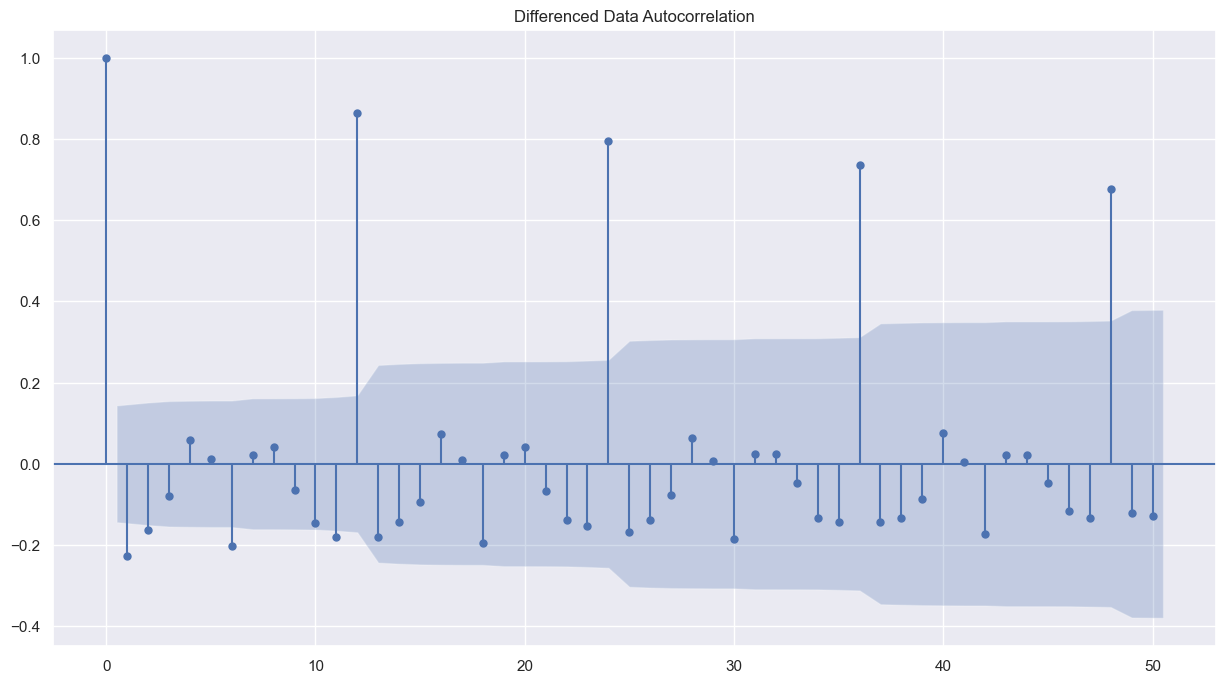

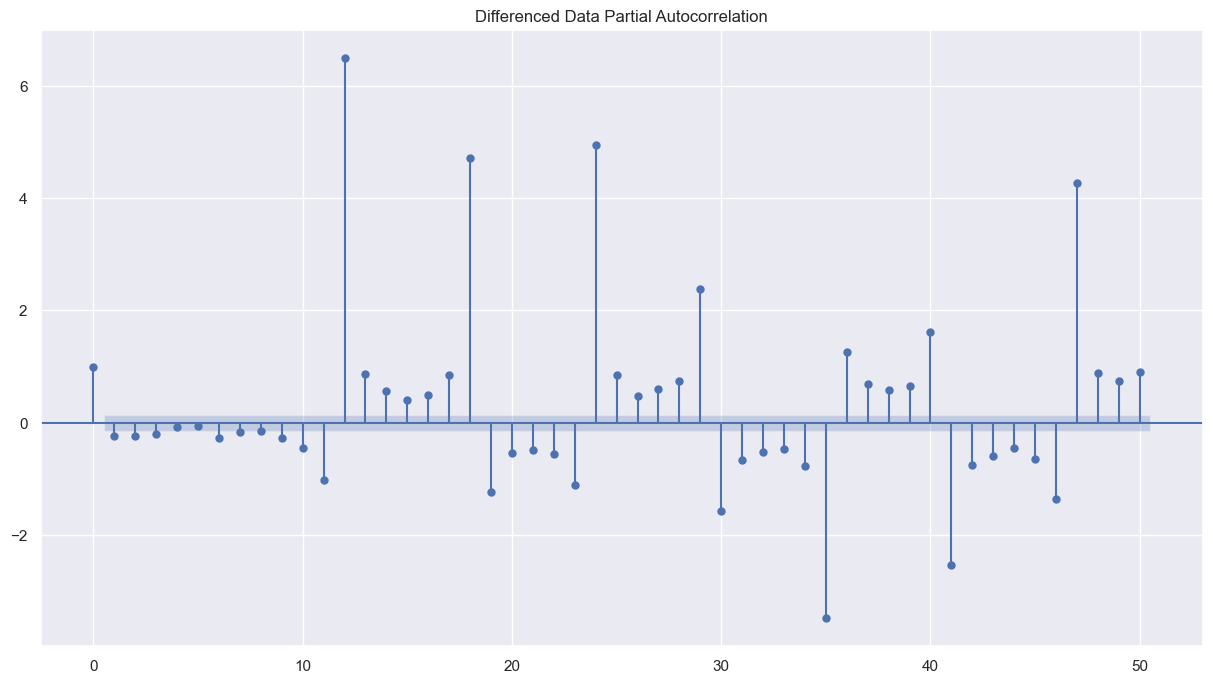

In [298]:
plot_acf(rdf["Rose"].diff().dropna(), lags=50, title="Differenced Data Autocorrelation")
plot_pacf(rdf["Rose"].diff().dropna(), lags=50, title="Differenced Data Partial Autocorrelation")

plt.show()

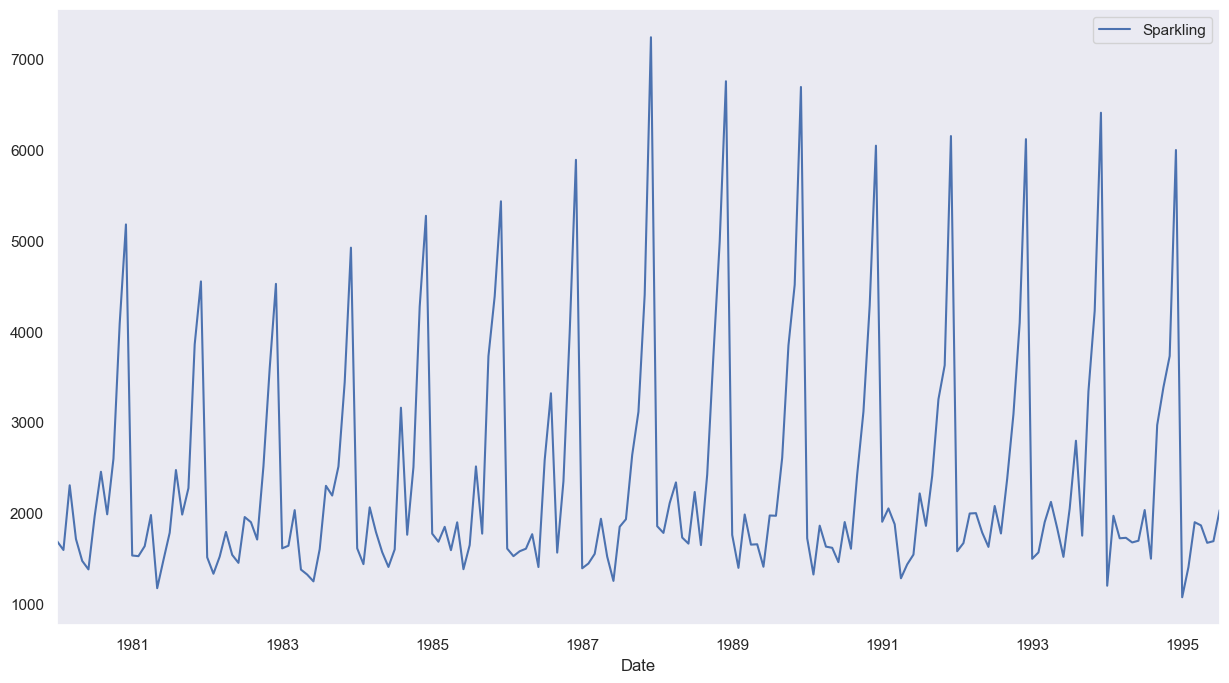

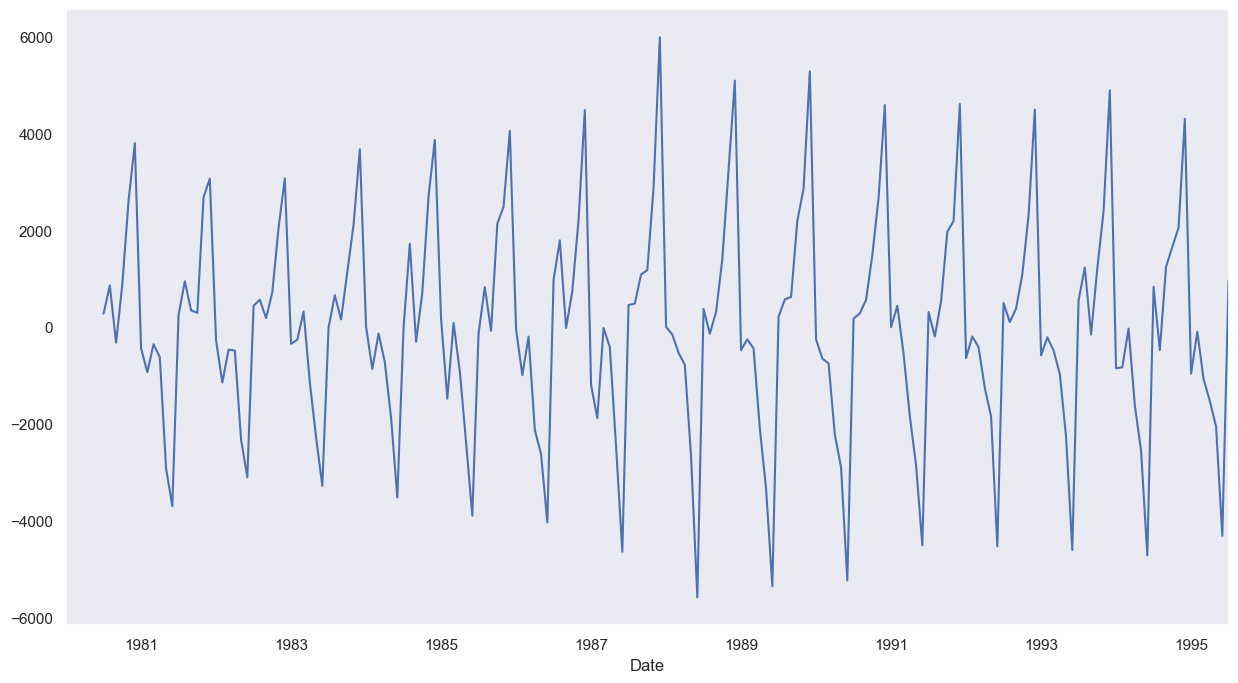

In [299]:
rdf.plot()
plt.grid()
plt.show()

(rdf["Rose"].diff(6)).plot()
plt.grid()
plt.show()

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

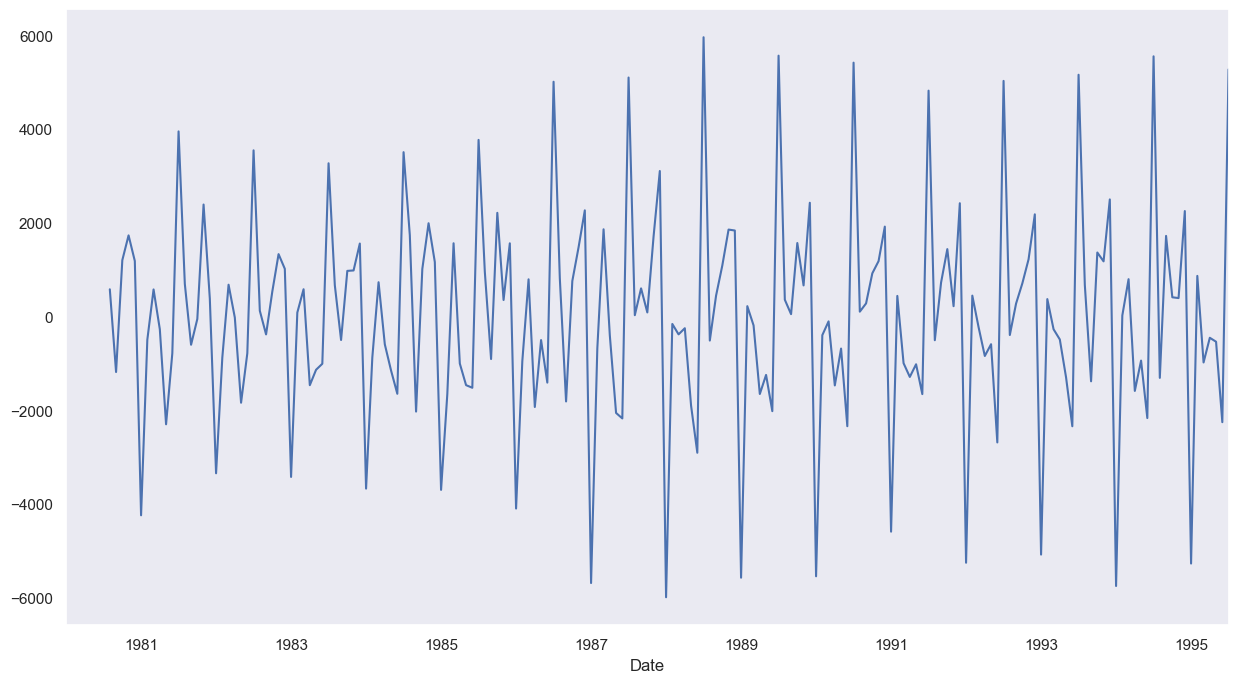

In [300]:
(rdf["Rose"].diff(6)).diff().plot()
plt.grid()
plt.show()

check the stationarity of the above series before fitting the SARIMA model.

In [301]:
adfuller((train["Rose"].diff(6).dropna()).diff(1).dropna())[1]

6.98650037953275e-10

Checking the ACF and the PACF plots for the new modified Time Series.

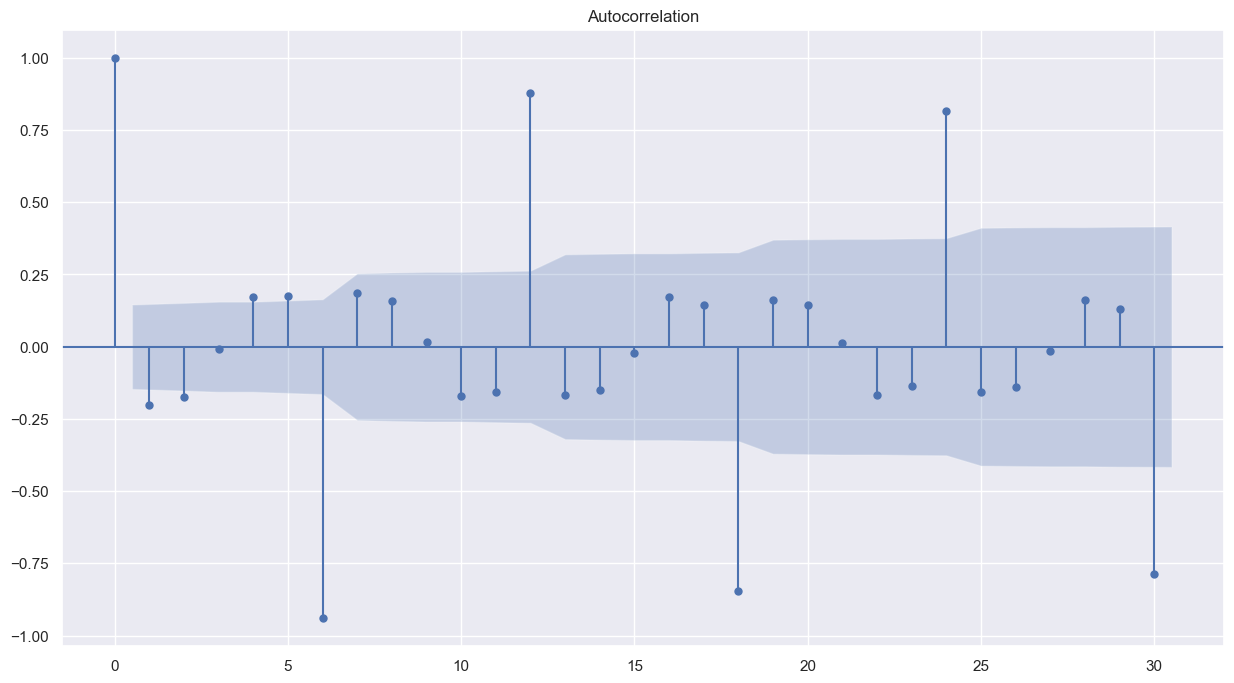

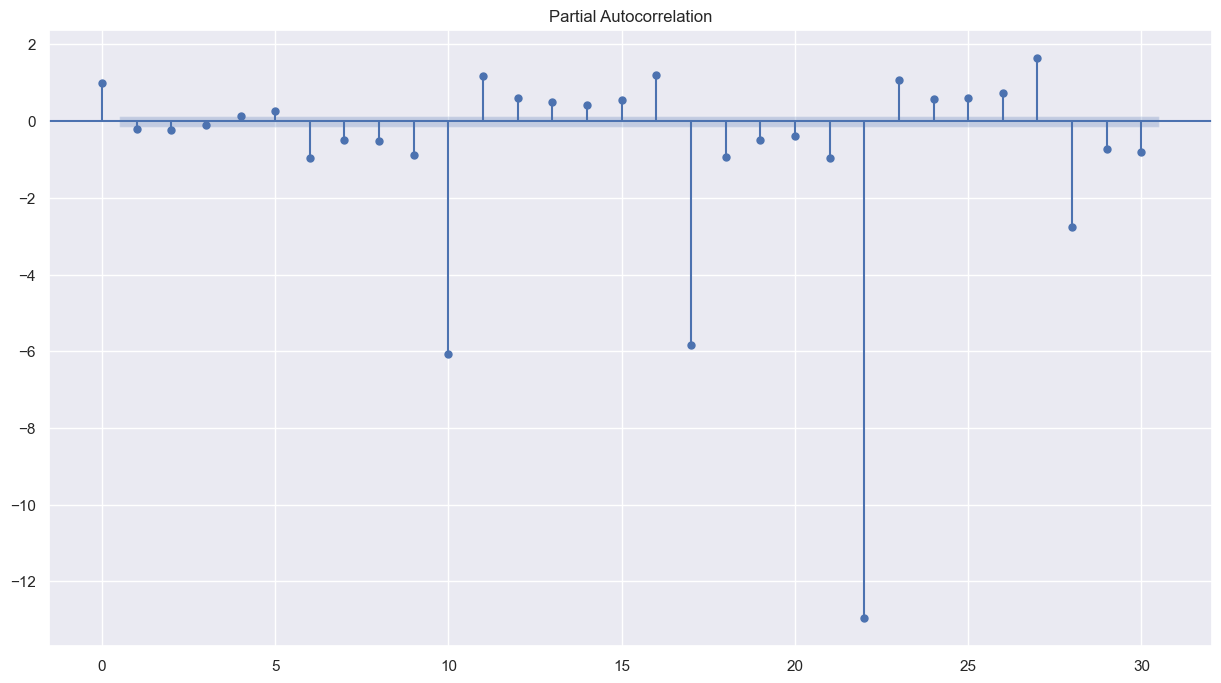

In [302]:
plot_acf((rdf["Rose"].diff(6).dropna()).diff(1).dropna(), lags=30)
plot_pacf((rdf["Rose"].diff(6).dropna()).diff(1).dropna(), lags=30)
plt.show()

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p(0) and q(0) parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2. 

In [303]:
manual_SARIMA_6 = SARIMAX(train["Rose"],
                         order=(2,1,2),
                         seasonal_order=(2,1,2,6),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
display(results_manual_SARIMA_6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Sparkling   No. Observations:                  130
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -796.955
Date:                           Fri, 13 Aug 2021   AIC                           1611.910
Time:                                   03:59:29   BIC                           1636.050
Sample:                               01-31-1980   HQIC                          1621.698
                                    - 10-31-1990                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6558      0.261     -2.508      0.012      -1.168      -0.143
ar.L2         -0.0535      0.150     -0.357      0.721      -0.348       0.241
ma.L1         -0.1388      0.234     -0.594      0.553      -0.597       0.319
ma.L2         -0.7408      0.236     -3.142      0.002      -1.203      -0.279
ar.S.L6       -1.0995      0.214     -5.146      0.000      -1.518      -0.681
ar.S.L12      -0.0758      0.221     -0.342      0.732      -0.509       0.358
ma.S.L6        0.2063      0.224      0.921      0.357      -0.233       0.645
ma.S.L12      -0.5695      0.096     -5.933      0.000      -0.758      -0.381
sigma2      1.476e+05   2.18e+04      6.766      0.000    1.05e+05     1.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.41
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             0.36
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [304]:
manual_SARIMA_12 = SARIMAX(train["Rose"],
                         order=(2,1,2),
                         seasonal_order=(2,1,2,12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
display(results_manual_SARIMA_12.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  130
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -668.833
Date:                            Fri, 13 Aug 2021   AIC                           1355.665
Time:                                    03:59:34   BIC                           1378.163
Sample:                                01-31-1980   HQIC                          1364.738
                                     - 10-31-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5699      0.276     -2.063      0.039      -1.111      -0.029
ar.L2          0.0136      0.147      0.092      0.926      -0.275       0.302
ma.L1         -0.1961      0.314     -0.624      0.532      -0.812       0.419
ma.L2         -0.8039      0.256     -3.139      0.002      -1.306      -0.302
ar.S.L12      -0.2824      0.472     -0.599      0.549      -1.206       0.642
ar.S.L24      -0.2641      0.218     -1.209      0.227      -0.692       0.164
ma.S.L12      -0.1330      0.475     -0.280      0.779      -1.064       0.798
ma.S.L24       0.1185      0.344      0.344      0.731      -0.556       0.793
sigma2       1.62e+05   1.66e-06   9.78e+10      0.000    1.62e+05    1.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                10.53
Prob(Q):                              0.92   Prob(JB):                         0.01
Heteroskedasticity (H):               0.89   Skew:                             0.50
Prob(H) (two-sided):                  0.76   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+28. Standard errors may be unstable.
"""

## Prediction on the Test Set and Evaluation

In [305]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

display(predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head())


rmse_manualsarima6 = rmse(test["Rose"], predicted_manual_SARIMA_6.predicted_mean)
display(rmse_manualsarima6)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_manualsarima6]}, index=["SARIMA(2,1,2)(2,1,2,6)"])

resultsDf = pd.concat([resultsDf, temp_resultsDf])


predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

display(predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head())


rmse_manualsarima12 = rmse(test["Rose"], predicted_manual_SARIMA_12.predicted_mean)
display(rmse_manualsarima12)

temp_resultsDf = pd.DataFrame({"Test RMSE": [rmse_manualsarima12]}, index=["SARIMA(2,1,2)(2,1,2,12)"])

resultsDf = pd.concat([resultsDf, temp_resultsDf])

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1990-11-30  4612.043085  384.338836    3858.752809    5365.333361
1990-12-31  6974.709939  392.363178    6205.692242    7743.727636
1991-01-31  1589.368191  393.230060     818.651436    2360.084947
1991-02-28  1229.949440  397.635813     450.597567    2009.301313
1991-03-31  1886.117929  397.730365    1106.580738    2665.655120

596.602075924135

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1990-11-30  4531.666681  404.548818    3738.765569    5324.567794
1990-12-31  7018.733806  416.400279    6202.604255    7834.863357
1991-01-31  1800.710746  418.633086     980.204974    2621.216517
1991-02-28  1545.417549  419.938817     722.352591    2368.482507
1991-03-31  2018.328902  420.092899    1194.961950    2841.695855

486.39673376214637

# Build table with all the above models with RMSE scores

In [326]:
display(resultsDf.sort_values(by=["Test RMSE"],ascending=True))

Test RMSE
Alpha=0.7,Beta=0.3,Gamma=0.3,TripleExponentialS...   410.692577
Alpha=0.146,Beta=0.053,Gamma=0.393,TripleExpone...   485.522236
SARIMA(2,1,2)(2,1,2,12)                              486.396734
SARIMA(2,1,2)(2,1,2,6)                               596.602076
SARIMA(1,1,2)(2,0,2,12)                              712.748401
2_point_trailing_Moving_Average                      811.178937
SARIMA(1,1,2)(2,0,2,6)                               871.032024
4_point_trailing_Moving_Average                     1184.213295
6_point_trailing_Moving_Average                     1337.200524
Alpha=0.03,SimpleExponentialSmoothing               1362.355521
Alpha=0.4,SimpleExponentialSmoothing                1363.037803
Manual ARIMA(3,1,2)                                 1363.340999
ARIMA(2,1,2)                                        1364.201025
SimpleAverageModel                                  1368.746717
RegressionOnTime                                    1392.438305
9_point_trailing_Moving_Average                     1422.653281
NaiveModel                                          1496.444629
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       1597.853999

## Build most optimum model on the Full Data

In [308]:
full_data_model = SARIMAX(rdf["Rose"], order=(2,1,2), seasonal_order=(2,1,2,12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
display(results_full_data_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1085.726
Date:                            Fri, 13 Aug 2021   AIC                           2189.453
Time:                                    04:03:34   BIC                           2216.367
Sample:                                01-31-1980   HQIC                          2200.388
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6655      0.275     -2.421      0.015      -1.204      -0.127
ar.L2         -0.0111      0.113     -0.099      0.921      -0.232       0.210
ma.L1         -0.1696      0.260     -0.652      0.515      -0.680       0.340
ma.L2         -0.7336      0.242     -3.032      0.002      -1.208      -0.259
ar.S.L12       0.0659      0.370      0.178      0.859      -0.659       0.791
ar.S.L24       0.2880      0.140      2.060      0.039       0.014       0.562
ma.S.L12      -0.7496      0.997     -0.752      0.452      -2.704       1.205
ma.S.L24      -0.2228      0.327     -0.682      0.495      -0.863       0.418
sigma2      1.332e+05   9.92e+04      1.343      0.179   -6.12e+04    3.28e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.11
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.56
Prob(H) (two-sided):                  0.68   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Use optimal model with lowest RMSE to predict 12 months into future with a plot and confidence intervals

In [323]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

display(predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head())

rmse_full_data = rmse(rdf["Rose"], results_full_data_model.fittedvalues)
display(rmse_full_data)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  2132.780768  373.933432    1399.884708    2865.676827
1995-09-30  2359.398551  379.074187    1616.426797    3102.370304
1995-10-31  3266.883405  379.149499    2523.764043    4010.002767
1995-11-30  4040.248353  381.486093    3292.549350    4787.947357
1995-12-31  6101.118514  381.593258    5353.209472    6849.027556

568.7905079219146

In [324]:
pred_full_manual_SARIMA_data = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start="1995-08-31", end="1996-07-31", freq="M"))

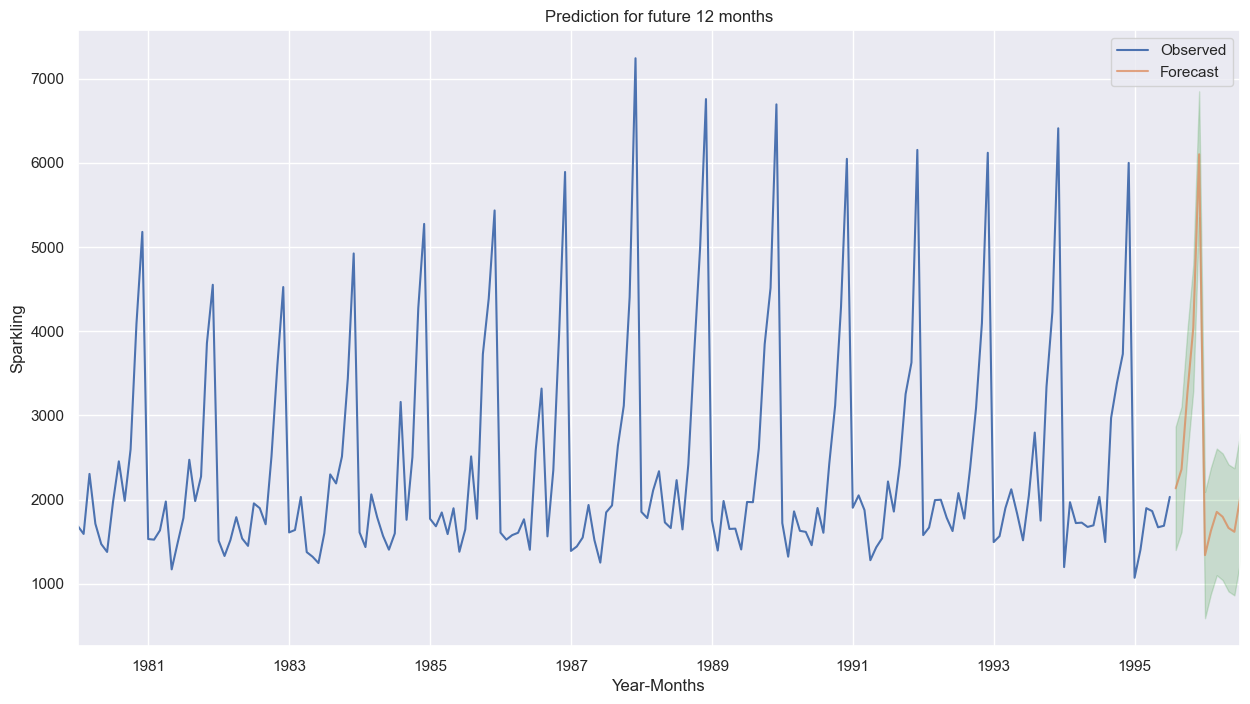

In [325]:
axis = rdf["Rose"].plot(label="Observed")

pred_full_manual_SARIMA_data["mean"].plot(ax=axis, label="Forecast", alpha=0.7)

axis.fill_between(pred_full_manual_SARIMA_data.index,
                 pred_full_manual_SARIMA_data["mean_ci_lower"],
                 pred_full_manual_SARIMA_data["mean_ci_upper"],
                 color="green",
                 alpha=0.15)

axis.set_xlabel("Year-Months")
axis.set_ylabel("Rose")
plt.title("Prediction for future 12 months")
plt.legend(loc="best")
plt.show()
